In [8]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', 10)

<IPython.core.display.Javascript object>

# **I- Class Imbalance Problem**

## **EDA Analysis**

In [10]:
import pandas as pd
# Loading train_data, test_data and test_data_hidden
df_init = pd.read_csv('/content/train_data.csv')
df_test_init = pd.read_csv('/content/test_data.csv')
df_htest_init = pd.read_csv('/content/test_data_hidden.csv')
#
df=df_init.copy(deep=True)
df_test=df_test_init.copy(deep=True)
df_htest=df_htest_init.copy(deep=True)
#

In [11]:
# train_data: Top 5 records
df.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [ ]:
# test_data: Top 5 records
df_test.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [ ]:
# test_data_hidden: Top 5 records
df_htest.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [ ]:
# train_data: info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               4000 non-null   object
 1   brand              4000 non-null   object
 2   categories         4000 non-null   object
 3   primaryCategories  4000 non-null   object
 4   reviews.date       4000 non-null   object
 5   reviews.text       4000 non-null   object
 6   reviews.title      3990 non-null   object
 7   sentiment          4000 non-null   object
dtypes: object(8)
memory usage: 250.1+ KB


In [ ]:
# test_data: info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [ ]:
# test_data_hidden: info
df_htest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
 7   sentiment          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [ ]:
# shape 
df.shape,df_test.shape,df_htest.shape

((4000, 8), (1000, 7), (1000, 8))

### **The same data for test_data and test_data_hidden, only that the sentiment column not exists for test_data**

In [ ]:
#---------------------------------
# same data test and htest ?
#----------------------------------
# df_htest.loc[:, df_htest.columns!='sentiment']
df_htest_no_target=df_htest.loc[:, df_htest.columns[:-1]]
#
#df_htest_no_target.info()
df_htest_no_target[df_htest_no_target==df_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [ ]:
len(df_htest_no_target[df_htest_no_target==df_test]),len(df_htest_no_target)

(1000, 1000)

### **The same value for columns sentiment of train_data and test_data_hidden**

In [ ]:
df.sentiment.value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

In [ ]:
df_htest.sentiment.value_counts()

Positive    937
Neutral      39
Negative     24
Name: sentiment, dtype: int64

### **Dropping missing values**

In [ ]:
# shape 
df.shape,df_test.shape,df_htest.shape

((4000, 8), (1000, 7), (1000, 8))

In [ ]:
# Dropping missing values
df.dropna(inplace=True)
df_test.dropna(inplace=True)
df_htest.dropna(inplace=True)
#
df=df.reset_index()
df_test=df_test.reset_index()
df_htest=df_htest.reset_index()
#
# shape 
df.shape,df_test.shape,df_htest.shape

((3990, 9), (997, 8), (997, 9))

## **1.	P1. Seeing what a positive, negative, and neutral review looks like**

In [ ]:
# these are previews in english
import random
#
for i in range(5):
  n = random.randint(0,len(df))
  print(df['reviews.title'].loc[n])
  print(len(df['reviews.text'].loc[n]),'     ',df['reviews.text'].loc[n],'\n')

Good tablet for basic purposes
99       I got this tablet for Skype calls and browsing. It's good if you don't have an ample scope of tasks 

Lots of problems. Want my old one back
208       1st kindle screen failed & had to reboot often. Customer Service couldn't fix. Replaced. 2nd one screen reboots often. Customer service offered replace. Just want one that works. Can't get upgrade replacement 

Awesome tablet
58       So far it does what I want. Very happy with the price too. 

Greater starter for my 2 yr. old grandson
64       Easy and simple for my grandson to use. Has no problem using it. 

ECHO PLUS GET ONE
155       The whole family uses the ECHO we love the ability to use just say Alexa and tell here what we want. The youngest granddaughter loves the insult generator! 



In [ ]:
df.index

RangeIndex(start=0, stop=3990, step=1)

In [ ]:
# df_t DataFrame temp
df_t=pd.DataFrame(index=range(0,len(df)))
df_t['len_preview_title']=0
df_t['len_preview_title'].loc[340]

0

In [ ]:
# df_t DataFrame temp
df_t=pd.DataFrame(index=range(0,len(df)))
df_t['len_preview_title']=0
df_t['len_preview_text']=0
#
for i in range(0,len(df)):
  df_t['len_preview_title'].loc[i]=len(df['reviews.title'].loc[i])
  df_t['len_preview_text'].loc[i]=len(df['reviews.text'].loc[i])


In [ ]:
print('df_t[\'len_preview_title\'].max()=',df_t['len_preview_title'].max())
print('df_t[\'len_preview_text\'].max()=',df_t['len_preview_text'].max())

df_t['len_preview_title'].max()= 71
df_t['len_preview_text'].max()= 8351


## 2.	**P2. Checking the class count for each class. Identification of imbalance class**

**Unbalanced data: Unbalanced with the target 'sentiment'**

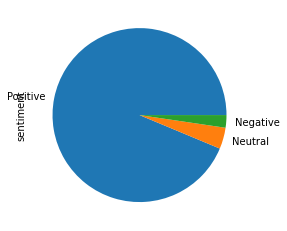

In [ ]:
df.sentiment.value_counts().plot.pie()

In [ ]:
for val in ['Positive','Negative','Neutral']:
  df_t=df[df['sentiment']==val]
  print(val)
  print('     >>',round(len(df_t)/len(df),2),'%')

Positive
     >> 0.94 %
Negative
     >> 0.02 %
Neutral
     >> 0.04 %


## **P3. Conversion of reviews in Tf-Idf score**

In [ ]:
# using function init_data_treatment()
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=5,i_ROS_op=False)

In [ ]:
X.head()

,reviews_title_text
0,powerful tablet purchased on black fridaypros ...
1,amazon echo plus awesome i purchased two amazo...
2,average just an average alexa option does show...
3,greattttttt very good product exactly what i w...
4,very durable this is the 3rd one ive purchased...


In [ ]:
X_test_for_htest.head()

,reviews_title_text
0,very handy device amazon kindle fire has a lot...
1,another winner from amazon the echo show is a ...
2,simple to use and reliable so far great value ...
3,love it i use mine for email facebook games an...
4,fantastic this is a fantastic item the person ...


In [ ]:
df_htest.head()

,name,brand,categories,primaryCategories,reviews.date,reviews_text,reviews_title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,2
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,2
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,2
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,2
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,2


In [ ]:
# processed preview
sentences[:5]

['powerful tablet purchased on black fridaypros great price even off salevery powerful and fast with quad core processors amazing soundwell builtcons amazon ads amazon need this to subsidize the tablet and will remove the adds if you pay them 15inability to access other apps except the ones from amazon there is a way which i was able to accomplish to add the google play storenet this is a great tablet for the money',
 'amazon echo plus awesome i purchased two amazon in echo plus and two dots plus four fire sticks and the hub philips hue for lamp for the family at christmas 2017 i‚äôm so happy with these purchases and learning so much with alexa you can start your daily routine with alexa and program it to whatever you would like to include news weather music horoscope also you can start your day off with a compliment and i think is very important alexa gave me the best chili recipe i mean the best it‚äôs called chili i i want my husband to use alexa to stay organized for business dates

In [ ]:
# sentiment
labels[:5]

[2, 2, 1, 2, 2]

In [ ]:
# checking
len(X_test_for_htest),len(df_htest)

(997, 997)

In [ ]:
# checking
len(X),len(sentences),len(labels)

(3990, 3990, 3990)

In [ ]:
# Data preparation for fit()
y=pd.Series(labels)
if isinstance(X, pd.core.frame.DataFrame):
  X=X['reviews_title_text'] # X must be Series for train after
Xtest_h=X_test_for_htest['reviews_title_text']
ytest_h=df_htest['sentiment']
#
Xtest_h.shape,ytest_h.shape,y.shape
#
# Split() X.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2992,), (998,), (2992,), (998,))

In [ ]:
# Tf-idf operation
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
#
# conversion of reviews in Tf-Idf score
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf=tf_idf.transform(X_test)
#print('X_test_tfidf.shape=',X_test_tfidf.shape)

## P4. **Running multinomial Naive Bayes classifier. demonstration of class imbalance problem with unique positive prediction!!**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB()
#
model_mnb.fit(X_train_tfidf,y_train)
model_mnb.score(X_train_tfidf,y_train),model_mnb.score(X_test_tfidf,y_test)

(0.9364973262032086, 0.938877755511022)

In [ ]:
# test for df_test et df_htest datasets
Xtest_h=X_test_for_htest['reviews_title_text']
model_mnb.score(tf_idf.transform(Xtest_h),df_htest['sentiment'])

0.9368104312938816

In [ ]:
# all prediction are Positive!
predict_test_h=model_mnb.predict(tf_idf.transform(Xtest_h))
predict_test_h_unique=set(predict_test_h)
predict_test_h_unique

{2}

# **II- Tackling Class Imbalance Problem**

## **P5. Tackle the class imbalance problem by using the technique of Oversampling or undersampling**

In [ ]:
# using function init_data_treatment()
# imblearn.over_sampling.RandomOverSampler to handle imbalanced data
# ===> i_ROS_op=True

sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=5,i_ROS_op=True)

In [ ]:
# checking
len(X_test_for_htest),len(df_htest)

(997, 997)

In [ ]:
# checking
len(X),len(sentences),len(labels)

(11217, 11217, 11217)

In [ ]:
# Data preparation for fit()
y=pd.Series(labels)
if isinstance(X, pd.core.frame.DataFrame):
  X=X['reviews_title_text'] # X must be Series for train after
Xtest_h=X_test_for_htest['reviews_title_text']
ytest_h=df_htest['sentiment']
#
Xtest_h.shape,ytest_h.shape,y.shape
#
# Split() X.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test

# Tf-idf operation
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_ROS = TfidfVectorizer()
#
# conversion of reviews in Tf-Idf score
X_train_tfidf = tf_idf_ROS.fit_transform(X_train)
X_test_tfidf=tf_idf_ROS.transform(X_test)
#print('X_test_tfidf.shape=',X_test_tfidf.shape)

In [ ]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
model_mnb_ROS = MultinomialNB()
#
model_mnb_ROS.fit(X_train_tfidf,y_train)
model_mnb_ROS.score(X_train_tfidf,y_train),model_mnb_ROS.score(X_test_tfidf,y_test)

(0.9749167855444603, 0.9557932263814617)

In [ ]:
# test for df_test et df_htest datasets
Xtest_h=X_test_for_htest['reviews_title_text']
model_mnb_ROS.score(tf_idf_ROS.transform(Xtest_h),df_htest['sentiment'])

0.8746238716148446

In [ ]:
# Prediction
predict_test_h=model_mnb_ROS.predict(tf_idf_ROS.transform(Xtest_h))
predict_test_h_unique=set(predict_test_h)
predict_test_h_unique

{0, 1, 2}

In [ ]:
pd.DataFrame(predict_test_h,columns=['sentiment']).value_counts()

sentiment
2            854
1            105
0             38
dtype: int64

## **P6. Metrics for evaluation**

**As we have class imbalance problem, we use those metrics for evaluating model performance: precision, recall, F1-score, and AUC-ROC curve. F1-Score metric will be used as a principal evaluation criteria for this project.** 

We proceed now, to evaluate BaggingClassifier with:    

**1- base_estimator=RandomForestClassifier()**

**2- base_estimator=XGBClassifier()** 



In [ ]:
# With ROS RandomOverSampler
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=5,i_ROS_op=True)

In [ ]:
# checking
len(X),len(sentences),len(labels)

(11217, 11217, 11217)

In [ ]:
# Data preparation for fit()
y=pd.Series(labels)
if isinstance(X, pd.core.frame.DataFrame):
  X=X['reviews_title_text'] # X must be Series for train after
Xtest_h=X_test_for_htest['reviews_title_text']
ytest_h=df_htest['sentiment']
#
Xtest_h.shape,ytest_h.shape,y.shape
#
# Split() X.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test

# Tf-idf operation
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
#
# conversion of reviews in Tf-Idf score
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf=tf_idf.transform(X_test)
#print('X_test_tfidf.shape=',X_test_tfidf.shape)

### Evaluate BaggingClassifier with base_estimator=RandomForestClassifier()

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

bag_model = BaggingClassifier(
  base_estimator=RandomForestClassifier(), 
  n_estimators=100, 
  max_samples=0.8, 
  bootstrap=True,
  oob_score=True,
  random_state=0
  )
#
fit_and_evaluate_model(bag_model,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model_data_h(bag_model,tf_idf_ROS,Xtest_h,ytest_h)

[[927   0   0]
 [  0 949   0]
 [  0   0 929]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00       949
           2       1.00      1.00      1.00       929

    accuracy                           1.00      2805
   macro avg       1.00      1.00      1.00      2805
weighted avg       1.00      1.00      1.00      2805

[[  7   0  17]
 [  0  12  27]
 [  0   0 934]]
              precision    recall  f1-score   support

           0       1.00      0.29      0.45        24
           1       1.00      0.31      0.47        39
           2       0.96      1.00      0.98       934

    accuracy                           0.96       997
   macro avg       0.99      0.53      0.63       997
weighted avg       0.96      0.96      0.94       997



### Evaluate BaggingClassifier with base_estimator=XGBClassifier()

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

bag_model = BaggingClassifier(
  base_estimator=XGBClassifier(), 
  n_estimators=100, 
  max_samples=0.8, 
  bootstrap=True,
  oob_score=True,
  random_state=0
  )
#
fit_and_evaluate_model(bag_model,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model_data_h(bag_model,tf_idf_ROS,Xtest_h,ytest_h)

[[927   0   0]
 [ 28 895  26]
 [ 23  72 834]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       927
           1       0.93      0.94      0.93       949
           2       0.97      0.90      0.93       929

    accuracy                           0.95      2805
   macro avg       0.95      0.95      0.95      2805
weighted avg       0.95      0.95      0.95      2805

[[ 15   3   6]
 [  5  24  10]
 [ 20  62 852]]
              precision    recall  f1-score   support

           0       0.38      0.62      0.47        24
           1       0.27      0.62      0.37        39
           2       0.98      0.91      0.95       934

    accuracy                           0.89       997
   macro avg       0.54      0.72      0.60       997
weighted avg       0.94      0.89      0.91       997



## **P7. Generation of models by Tree-based classifiers Random Forest and XGBoost**

### **Case of Random Forest Classifier**  

#### Evaluation with class_weight option

In [ ]:
# Without ROS RandomOverSampler
# ===> i_ROS_op=False
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=5,i_ROS_op=False)

In [ ]:
# checking
len(X_test_for_htest),len(df_htest)

(997, 997)

In [ ]:
# checking
len(X),len(sentences),len(labels)

(3990, 3990, 3990)

In [ ]:
# Data preparation for fit()
y=pd.Series(labels)
if isinstance(X, pd.core.frame.DataFrame):
  X=X['reviews_title_text'] # X must be Series for train after
Xtest_h=X_test_for_htest['reviews_title_text']
ytest_h=df_htest['sentiment']
#
Xtest_h.shape,ytest_h.shape,y.shape
#
# Split() X.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test

# Tf-idf operation
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
#
# conversion of reviews in Tf-Idf score
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf=tf_idf.transform(X_test)
#print('X_test_tfidf.shape=',X_test_tfidf.shape)

In [ ]:
# RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
#
model_rfc = RandomForestClassifier(random_state=0, class_weight='balanced')
#
fit_and_evaluate_model(model_rfc,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model_data_h(model_rfc,tf_idf,Xtest_h,ytest_h)

[[  3   0  19]
 [  0   6  33]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       1.00      0.14      0.24        22
           1       1.00      0.15      0.27        39
           2       0.95      1.00      0.97       937

    accuracy                           0.95       998
   macro avg       0.98      0.43      0.49       998
weighted avg       0.95      0.95      0.93       998

[[  4   0  20]
 [  0   6  33]
 [  0   0 934]]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        24
           1       1.00      0.15      0.27        39
           2       0.95      1.00      0.97       934

    accuracy                           0.95       997
   macro avg       0.98      0.44      0.51       997
weighted avg       0.95      0.95      0.93       997



#### Evaluation <u>with</u> RandomOverSampler operation

In [ ]:
# With ROS RandomOverSampler
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=5,i_ROS_op=True)

In [ ]:
# checking
len(X_test_for_htest),len(df_htest)

(997, 997)

In [ ]:
# checking
len(X),len(sentences),len(labels)

(11217, 11217, 11217)

In [ ]:
# Data preparation for fit()
y=pd.Series(labels)
if isinstance(X, pd.core.frame.DataFrame):
  X=X['reviews_title_text'] # X must be Series for train after
Xtest_h=X_test_for_htest['reviews_title_text']
ytest_h=df_htest['sentiment']
#
Xtest_h.shape,ytest_h.shape,y.shape
#
# Split() X.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test

# Tf-idf operation
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_ROS = TfidfVectorizer()
#
# conversion of reviews in Tf-Idf score
X_train_tfidf = tf_idf_ROS.fit_transform(X_train)
X_test_tfidf=tf_idf_ROS.transform(X_test)
#print('X_test_tfidf.shape=',X_test_tfidf.shape)

In [ ]:
# RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
#
model_rfc_ROS = RandomForestClassifier(random_state=0)
#
fit_and_evaluate_model(model_rfc_ROS,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model_data_h(model_rfc_ROS,tf_idf_ROS,Xtest_h,ytest_h)

[[927   0   0]
 [  0 949   0]
 [  0   0 929]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00       949
           2       1.00      1.00      1.00       929

    accuracy                           1.00      2805
   macro avg       1.00      1.00      1.00      2805
weighted avg       1.00      1.00      1.00      2805

[[  7   0  17]
 [  0  10  29]
 [  0   0 934]]
              precision    recall  f1-score   support

           0       1.00      0.29      0.45        24
           1       1.00      0.26      0.41        39
           2       0.95      1.00      0.98       934

    accuracy                           0.95       997
   macro avg       0.98      0.52      0.61       997
weighted avg       0.96      0.95      0.94       997



### **Case of XGBoost**

#### Evaluation with scale_pos_weight option

In [ ]:
# Without ROS RandomOverSampler
# ===> i_ROS_op=False
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=5,i_ROS_op=False)

In [ ]:
# checking
len(X),len(sentences),len(labels)

(3990, 3990, 3990)

In [ ]:
# Data preparation for fit()
y=pd.Series(labels)
if isinstance(X, pd.core.frame.DataFrame):
  X=X['reviews_title_text'] # X must be Series for train after
Xtest_h=X_test_for_htest['reviews_title_text']
ytest_h=df_htest['sentiment']
#
Xtest_h.shape,ytest_h.shape,y.shape
#
# Split() X.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test

# Tf-idf operation
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
#
# conversion of reviews in Tf-Idf score
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf=tf_idf.transform(X_test)
#print('X_test_tfidf.shape=',X_test_tfidf.shape)

In [ ]:
# calculation the value of scale_pos_weight
coeff=int(len(df[df['sentiment']=='Positive'])/len(df[df['sentiment']=='Negative']))
coeff

40

In [ ]:
# XGBoost
#
from xgboost import XGBClassifier

model_xgb1 = XGBClassifier(scale_pos_weight=coeff)  # coeff=40
#
fit_and_evaluate_model(model_xgb1,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model_data_h(model_xgb1,tf_idf,Xtest_h,ytest_h)

[[  3   2  17]
 [  0   4  35]
 [  0   5 932]]
              precision    recall  f1-score   support

           0       1.00      0.14      0.24        22
           1       0.36      0.10      0.16        39
           2       0.95      0.99      0.97       937

    accuracy                           0.94       998
   macro avg       0.77      0.41      0.46       998
weighted avg       0.93      0.94      0.92       998

[[  4   1  19]
 [  1   4  34]
 [  1   0 933]]
              precision    recall  f1-score   support

           0       0.67      0.17      0.27        24
           1       0.80      0.10      0.18        39
           2       0.95      1.00      0.97       934

    accuracy                           0.94       997
   macro avg       0.80      0.42      0.47       997
weighted avg       0.93      0.94      0.92       997



#### Evaluation <u>with</u> RandomOverSampler operation

In [ ]:
# using function init_data_treatment()
# imblearn.over_sampling.RandomOverSampler to handle imbalanced data
# ===> i_ROS_op=True

sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=5,i_ROS_op=True)

In [ ]:
# checking
len(X),len(sentences),len(labels)

(11217, 11217, 11217)

In [ ]:
# Data preparation for fit()
y=pd.Series(labels)
if isinstance(X, pd.core.frame.DataFrame):
  X=X['reviews_title_text'] # X must be Series for train after
Xtest_h=X_test_for_htest['reviews_title_text']
ytest_h=df_htest['sentiment']
#
Xtest_h.shape,ytest_h.shape,y.shape
#
# Split() X.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test

# Tf-idf operation
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_ROS = TfidfVectorizer()
#
# conversion of reviews in Tf-Idf score
X_train_tfidf = tf_idf_ROS.fit_transform(X_train)
X_test_tfidf=tf_idf_ROS.transform(X_test)
#print('X_test_tfidf.shape=',X_test_tfidf.shape)

In [ ]:
# XGBoost
#
from xgboost import XGBClassifier
model_xgb_ROS = XGBClassifier()
#
fit_and_evaluate_model(model_xgb_ROS,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model_data_h(model_xgb_ROS,tf_idf_ROS,Xtest_h,ytest_h)

[[927   0   0]
 [ 28 895  26]
 [ 21  64 844]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       927
           1       0.93      0.94      0.94       949
           2       0.97      0.91      0.94       929

    accuracy                           0.95      2805
   macro avg       0.95      0.95      0.95      2805
weighted avg       0.95      0.95      0.95      2805

[[ 16   3   5]
 [  4  24  11]
 [ 19  57 858]]
              precision    recall  f1-score   support

           0       0.41      0.67      0.51        24
           1       0.29      0.62      0.39        39
           2       0.98      0.92      0.95       934

    accuracy                           0.90       997
   macro avg       0.56      0.73      0.62       997
weighted avg       0.94      0.90      0.92       997



# **III- Model Selection**

## **P8. Generation of models by the two approaches: multi-class SVM’s and neural nets**

### **Generation of models by multi-class SVM’s approch**

#### Evaluation <u>without</u> RandomOverSampler operation

In [ ]:
# Without ROS RandomOverSampler
# ===> i_ROS_op=False
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=5,i_ROS_op=False)

In [ ]:
# checking
len(X),len(sentences),len(labels)

(3990, 3990, 3990)

In [ ]:
# Data preparation for fit()
y=pd.Series(labels)
if isinstance(X, pd.core.frame.DataFrame):
  X=X['reviews_title_text'] # X must be Series for train after
Xtest_h=X_test_for_htest['reviews_title_text']
ytest_h=df_htest['sentiment']
#
Xtest_h.shape,ytest_h.shape,y.shape
#
# Split() X.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test

# Tf-idf operation
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
#
# conversion of reviews in Tf-Idf score
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf=tf_idf.transform(X_test)
#print('X_test_tfidf.shape=',X_test_tfidf.shape)

In [ ]:
from sklearn.svm import SVC
model_svc = SVC()
#
fit_and_evaluate_model(model_svc,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model_data_h(model_svc,tf_idf,Xtest_h,ytest_h)

[[  1   0  21]
 [  0   3  36]
 [  0   0 937]]
              precision    recall  f1-score   support

           0       1.00      0.05      0.09        22
           1       1.00      0.08      0.14        39
           2       0.94      1.00      0.97       937

    accuracy                           0.94       998
   macro avg       0.98      0.37      0.40       998
weighted avg       0.95      0.94      0.92       998

[[  4   0  20]
 [  0   4  35]
 [  0   0 934]]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29        24
           1       1.00      0.10      0.19        39
           2       0.94      1.00      0.97       934

    accuracy                           0.94       997
   macro avg       0.98      0.42      0.48       997
weighted avg       0.95      0.94      0.92       997



#### Evaluation <u>with</u> RandomOverSampler operation

In [ ]:
# using function init_data_treatment()
# imblearn.over_sampling.RandomOverSampler to handle imbalanced data
# ===> i_ROS_op=True

sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=5,i_ROS_op=True)

In [ ]:
# checking
len(X),len(sentences),len(labels)

(11217, 11217, 11217)

In [ ]:
# Data preparation for fit()
y=pd.Series(labels)
if isinstance(X, pd.core.frame.DataFrame):
  X=X['reviews_title_text'] # X must be Series for train after
Xtest_h=X_test_for_htest['reviews_title_text']
ytest_h=df_htest['sentiment']
#
Xtest_h.shape,ytest_h.shape,y.shape
#
# Split() X.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test

# Tf-idf operation
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_ROS = TfidfVectorizer()
#
# conversion of reviews in Tf-Idf score
X_train_tfidf = tf_idf_ROS.fit_transform(X_train)
X_test_tfidf=tf_idf_ROS.transform(X_test)
#print('X_test_tfidf.shape=',X_test_tfidf.shape)

In [ ]:
from sklearn.svm import SVC
model_svc_ROS = SVC()
#
fit_and_evaluate_model(model_svc_ROS,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model_data_h(model_svc_ROS,tf_idf_ROS,Xtest_h,ytest_h)

[[927   0   0]
 [  0 949   0]
 [  0   1 928]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       1.00      1.00      1.00       949
           2       1.00      1.00      1.00       929

    accuracy                           1.00      2805
   macro avg       1.00      1.00      1.00      2805
weighted avg       1.00      1.00      1.00      2805

[[  8   0  16]
 [  0  11  28]
 [  0   0 934]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        24
           1       1.00      0.28      0.44        39
           2       0.96      1.00      0.98       934

    accuracy                           0.96       997
   macro avg       0.99      0.54      0.64       997
weighted avg       0.96      0.96      0.94       997



### **Generation of models by neural nets approch**

#### Evaluation <u>without</u> RandomOverSampler operation

In [ ]:
# Without ROS RandomOverSampler
# ===> i_ROS_op=False
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=7,i_ROS_op=False)

In [ ]:
X.shape

(3990, 1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 dropout_6 (Dropout)         (None, 120, 16)           0         
                                                                 
 dense_6 (Dense)             (None, 120, 30)           510       
                                                                 
 dropout_7 (Dropout)         (None, 120, 30)           0         
                                                                 
 flatten_3 (Flatten)         (None, 3600)              0         
                                                                 
 dense_7 (Dense)             (None, 3)                 10803     
                                                                 
 activation_3 (Activation)   (None, 3)                

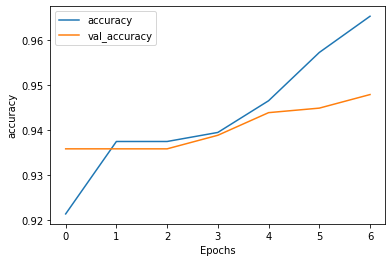

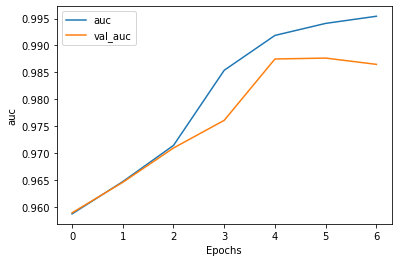

[[  9   2  13]
 [  2   8  29]
 [  0   3 931]]
              precision    recall  f1-score   support

           0       0.82      0.38      0.51        24
           1       0.62      0.21      0.31        39
           2       0.96      1.00      0.98       934

    accuracy                           0.95       997
   macro avg       0.80      0.53      0.60       997
weighted avg       0.94      0.95      0.94       997



In [ ]:
################################
#*** Treatment---> Case 1_layer_Dense
###############################

#'Bi_LTSM', 1_layer_GRU, 1_layer_LTSM
choise_model='1_layer_Dense'

# model generation
(model_tf,history_tf)=treatment_case_tensorflow(sentences,labels,choise_model,tokenizer,dico_params)

# plot history graphs history for metrics accuracy and AUC
plot_graphs_history(history_tf, 'accuracy')
plot_graphs_history(history_tf, 'auc')
#plot_graphs_history(history_tf, 'loss')

# evaluation
evaluate_model_tf(model_tf,X_test_for_htest,df_htest,dico_params,tokenizer)

#### Evaluation <u>with</u> RandomOverSampler operation

In [ ]:
# With ROS RandomOverSampler
# ===> i_ROS_op=True
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=7,i_ROS_op=True)

In [ ]:
X.shape

(11217, 1)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 120, 16)           160000    
                                                                 
 dropout_16 (Dropout)        (None, 120, 16)           0         
                                                                 
 dense_16 (Dense)            (None, 120, 30)           510       
                                                                 
 dropout_17 (Dropout)        (None, 120, 30)           0         
                                                                 
 flatten_8 (Flatten)         (None, 3600)              0         
                                                                 
 dense_17 (Dense)            (None, 3)                 10803     
                                                                 
 activation_8 (Activation)   (None, 3)                

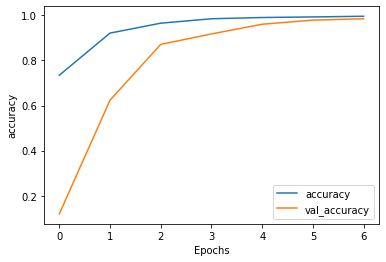

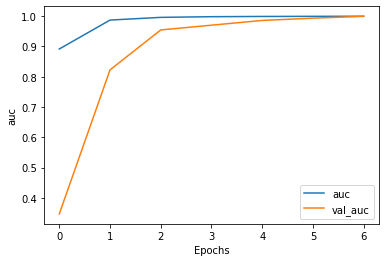

[[  9   3  12]
 [  3  16  20]
 [  2   6 926]]
              precision    recall  f1-score   support

           0       0.64      0.38      0.47        24
           1       0.64      0.41      0.50        39
           2       0.97      0.99      0.98       934

    accuracy                           0.95       997
   macro avg       0.75      0.59      0.65       997
weighted avg       0.95      0.95      0.95       997



In [ ]:
################################
#*** Treatment---> Case 1_layer_Dense
###############################

#'Bi_LTSM', 1_layer_GRU, 1_layer_LTSM
choise_model='1_layer_Dense'

# model generation
(model_tf,history_tf)=treatment_case_tensorflow(sentences,labels,choise_model,tokenizer,dico_params)

# plot history graphs history for metrics accuracy and AUC
plot_graphs_history(history_tf, 'accuracy')
plot_graphs_history(history_tf, 'auc')
#plot_graphs_history(history_tf, 'loss')

# evaluation
evaluate_model_tf(model_tf,X_test_for_htest,df_htest,dico_params,tokenizer)

## **P9. Generation of models by ensemble techniques: oversampled XGboost and oversampled multinomial_NB**

In [ ]:
# imblearn.over_sampling.RandomOverSampler to handle imbalanced data
# ===> i_ROS_op=True

sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=5,i_ROS_op=True)

In [ ]:
# checking
len(X),len(sentences),len(labels)

(11217, 11217, 11217)

In [ ]:
# Data preparation for fit()
y=pd.Series(labels)
if isinstance(X, pd.core.frame.DataFrame):
  X=X['reviews_title_text'] # X must be Series for train after
Xtest_h=X_test_for_htest['reviews_title_text']
ytest_h=df_htest['sentiment']
#
Xtest_h.shape,ytest_h.shape,y.shape
#
# Split() X.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test

# Tf-idf operation
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_ROS = TfidfVectorizer()
#
# conversion of reviews in Tf-Idf score
X_train_tfidf = tf_idf_ROS.fit_transform(X_train)
X_test_tfidf=tf_idf_ROS.transform(X_test)
#print('X_test_tfidf.shape=',X_test_tfidf.shape)

###**Case XGBoost**

In [ ]:
# XGBoost
#
from xgboost import XGBClassifier

model_xgb_ROS = XGBClassifier(
  n_splits=10,
  learning_rate =0.1,
  n_estimators=1000,
  max_depth=5,
  min_child_weight=1,
  gamma=0,
  subsample=0.8,
  colsample_bytree=0.8,
  objective= 'binary:logistic',
  scale_pos_weight=1,
  seed=27)

fit_and_evaluate_model(model_xgb_ROS,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model_data_h(model_xgb_ROS,tf_idf_ROS,Xtest_h,ytest_h)

[[927   0   0]
 [  0 949   0]
 [  3  12 914]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       0.99      1.00      0.99       949
           2       1.00      0.98      0.99       929

    accuracy                           0.99      2805
   macro avg       0.99      0.99      0.99      2805
weighted avg       0.99      0.99      0.99      2805

[[ 13   2   9]
 [  2  14  23]
 [  2   8 924]]
              precision    recall  f1-score   support

           0       0.76      0.54      0.63        24
           1       0.58      0.36      0.44        39
           2       0.97      0.99      0.98       934

    accuracy                           0.95       997
   macro avg       0.77      0.63      0.69       997
weighted avg       0.95      0.95      0.95       997



In [ ]:
# Another test for XGBClassifier()
'''
model_xgb_ROS = XGBClassifier(n_splits=10,base_score=0.5, booster='gbtree', colsample_bylevel=1,
colsample_bynode=1, colsample_bytree=0.9, gamma=0,
learning_rate=0.1, max_delta_step=0, max_depth=10,
min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
nthread=None, objective='binary:logistic', random_state=0,
reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
silent=None, subsample=0.9, verbosity=0)
#
fit_and_evaluate_model(model_xgb_ROS,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model_data_h(model_xgb_ROS,tf_idf_ROS,Xtest_h,ytest_h)
'''

### **Case Naive Bayes: MultinomialNB**

In [ ]:
# MultinomialNB   
from sklearn.naive_bayes import MultinomialNB
model_mnb_ROS = MultinomialNB(alpha=0.7,fit_prior=True)
#
fit_and_evaluate_model(model_mnb_ROS,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model_data_h(model_mnb_ROS,tf_idf_ROS,Xtest_h,ytest_h)

[[927   0   0]
 [  0 934  15]
 [ 20  76 833]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       927
           1       0.92      0.98      0.95       949
           2       0.98      0.90      0.94       929

    accuracy                           0.96      2805
   macro avg       0.96      0.96      0.96      2805
weighted avg       0.96      0.96      0.96      2805

[[ 11   7   6]
 [  4  20  15]
 [ 19  69 846]]
              precision    recall  f1-score   support

           0       0.32      0.46      0.38        24
           1       0.21      0.51      0.30        39
           2       0.98      0.91      0.94       934

    accuracy                           0.88       997
   macro avg       0.50      0.63      0.54       997
weighted avg       0.93      0.88      0.90       997



# **IV- Neural network models: Application of LSTM and GRU layers**

## **GRU Layers**

### Evaluation <u>without</u> RandomOverSampler operation

In [ ]:
# Without ROS RandomOverSampler
# ===> i_ROS_op=False
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=12,i_ROS_op=False)

In [ ]:
X.shape

(3990, 1)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 120, 16)           160000    
                                                                 
 dropout_20 (Dropout)        (None, 120, 16)           0         
                                                                 
 gru_1 (GRU)                 (None, 120)               49680     
                                                                 
 dropout_21 (Dropout)        (None, 120)               0         
                                                                 
 dense_19 (Dense)            (None, 3)                 363       
                                                                 
 activation_10 (Activation)  (None, 3)                 0         
                                                                 
Total params: 210,043
Trainable params: 210,043
Non-t

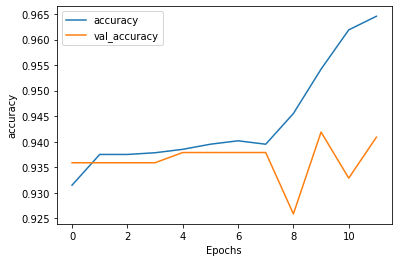

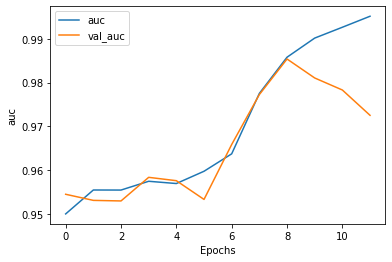

[[  2  10  12]
 [  0  15  24]
 [  2   8 924]]
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        24
           1       0.45      0.38      0.42        39
           2       0.96      0.99      0.98       934

    accuracy                           0.94       997
   macro avg       0.64      0.49      0.51       997
weighted avg       0.93      0.94      0.93       997



In [ ]:
################################
#*** Treatment---> Case 1_layer_GRU
###############################

#'Bi_LTSM', 1_layer_GRU, 1_layer_LTSM
choise_model='1_layer_GRU'

# model generation
(model_tf,history_tf)=treatment_case_tensorflow(sentences,labels,choise_model,tokenizer,dico_params)

# plot history graphs history for metrics accuracy and AUC
plot_graphs_history(history_tf, 'accuracy')
plot_graphs_history(history_tf, 'auc')
#plot_graphs_history(history_tf, 'loss')

# evaluation
evaluate_model_tf(model_tf,X_test_for_htest,df_htest,dico_params,tokenizer)

### Evaluation <u>with</u> RandomOverSampler operation

In [ ]:
# Without ROS RandomOverSampler
# ===> i_ROS_op=True
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=12,i_ROS_op=True)

In [ ]:
X.shape

(11217, 1)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 120, 16)           160000    
                                                                 
 dropout_22 (Dropout)        (None, 120, 16)           0         
                                                                 
 gru_2 (GRU)                 (None, 120)               49680     
                                                                 
 dropout_23 (Dropout)        (None, 120)               0         
                                                                 
 dense_20 (Dense)            (None, 3)                 363       
                                                                 
 activation_11 (Activation)  (None, 3)                 0         
                                                                 
Total params: 210,043
Trainable params: 210,043
Non-t

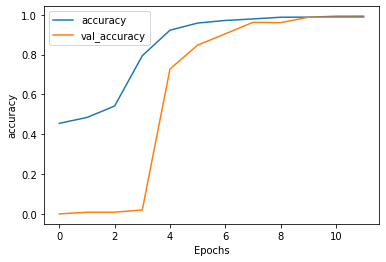

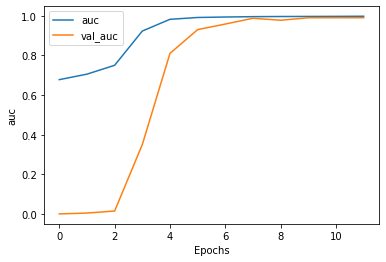

[[ 11   4   9]
 [  3  14  22]
 [  0  25 909]]
              precision    recall  f1-score   support

           0       0.79      0.46      0.58        24
           1       0.33      0.36      0.34        39
           2       0.97      0.97      0.97       934

    accuracy                           0.94       997
   macro avg       0.69      0.60      0.63       997
weighted avg       0.94      0.94      0.94       997



In [ ]:
################################
#*** Treatment---> Case 1_layer_GRU
###############################

#'Bi_LTSM', 1_layer_GRU, 1_layer_LTSM
choise_model='1_layer_GRU'

# model generation
(model_tf,history_tf)=treatment_case_tensorflow(sentences,labels,choise_model,tokenizer,dico_params)

# plot history graphs history for metrics accuracy and AUC
plot_graphs_history(history_tf, 'accuracy')
plot_graphs_history(history_tf, 'auc')
#plot_graphs_history(history_tf, 'loss')

# evaluation
evaluate_model_tf(model_tf,X_test_for_htest,df_htest,dico_params,tokenizer)

## **Simple LSTM Layers**

### Evaluation <u>without</u> RandomOverSampler operation

In [ ]:
# Without ROS RandomOverSampler
# ===> i_ROS_op=False
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=7,i_ROS_op=False)

In [ ]:
X.shape

(3990, 1)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 120, 16)           160000    
                                                                 
 dropout_42 (Dropout)        (None, 120, 16)           0         
                                                                 
 lstm_9 (LSTM)               (None, 64)                20736     
                                                                 
 dropout_43 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 3)                 195       
                                                                 
 activation_21 (Activation)  (None, 3)                 0         
                                                                 
Total params: 180,931
Trainable params: 180,931
Non-t

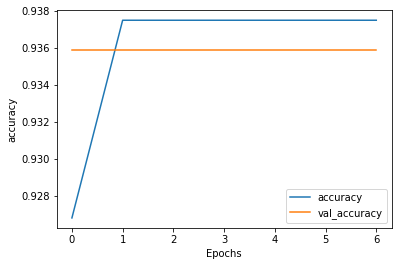

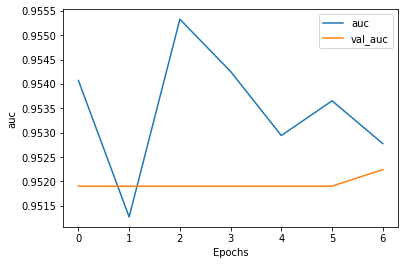

[[  0   0  24]
 [  0   0  39]
 [  0   0 934]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        39
           2       0.94      1.00      0.97       934

    accuracy                           0.94       997
   macro avg       0.31      0.33      0.32       997
weighted avg       0.88      0.94      0.91       997



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
################################
#*** Treatment---> Case 1_layer_LSTM
###############################

#'Bi_LSTM', 1_layer_GRU, 1_layer_LSTM
choise_model='1_layer_LSTM'

# model generation
(model_tf,history_tf)=treatment_case_tensorflow(sentences,labels,choise_model,tokenizer,dico_params)

# plot history graphs history for metrics accuracy and AUC
plot_graphs_history(history_tf, 'accuracy')
plot_graphs_history(history_tf, 'auc')
#plot_graphs_history(history_tf, 'loss')

# evaluation
evaluate_model_tf(model_tf,X_test_for_htest,df_htest,dico_params,tokenizer)

### Evaluation <u>with</u> RandomOverSampler operation

In [ ]:
# Without ROS RandomOverSampler
# ===> i_ROS_op=True
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=7,i_ROS_op=True)

In [ ]:
X.shape

(11217, 1)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 120, 16)           160000    
                                                                 
 dropout_44 (Dropout)        (None, 120, 16)           0         
                                                                 
 lstm_10 (LSTM)              (None, 64)                20736     
                                                                 
 dropout_45 (Dropout)        (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 3)                 195       
                                                                 
 activation_22 (Activation)  (None, 3)                 0         
                                                                 
Total params: 180,931
Trainable params: 180,931
Non-t

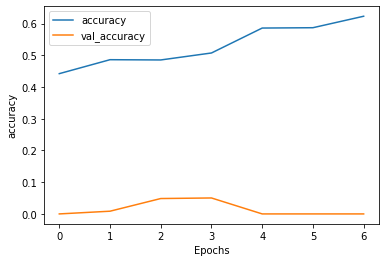

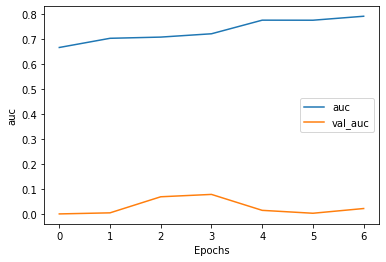

[[  7   0  17]
 [  2   0  37]
 [ 39   0 895]]
              precision    recall  f1-score   support

           0       0.15      0.29      0.19        24
           1       0.00      0.00      0.00        39
           2       0.94      0.96      0.95       934

    accuracy                           0.90       997
   macro avg       0.36      0.42      0.38       997
weighted avg       0.89      0.90      0.90       997



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
################################
#*** Treatment---> Case 1_layer_LSTM
###############################

#'Bi_LSTM', 1_layer_GRU, 1_layer_LSTM
choise_model='1_layer_LSTM'

# model generation
(model_tf,history_tf)=treatment_case_tensorflow(sentences,labels,choise_model,tokenizer,dico_params)

# plot history graphs history for metrics accuracy and AUC
plot_graphs_history(history_tf, 'accuracy')
plot_graphs_history(history_tf, 'auc')
#plot_graphs_history(history_tf, 'loss')

# evaluation
evaluate_model_tf(model_tf,X_test_for_htest,df_htest,dico_params,tokenizer)

## **Bidirectional LSTM Layers**

### Evaluation <u>without</u> RandomOverSampler operation

In [ ]:
# Without ROS RandomOverSampler
# ===> i_ROS_op=False
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=7,i_ROS_op=False)

In [ ]:
X.shape

(3990, 1)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 120, 16)           160000    
                                                                 
 dropout_46 (Dropout)        (None, 120, 16)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dropout_47 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 24)                1560      
                                                                 
 dropout_48 (Dropout)        (None, 24)                0         
                                                     

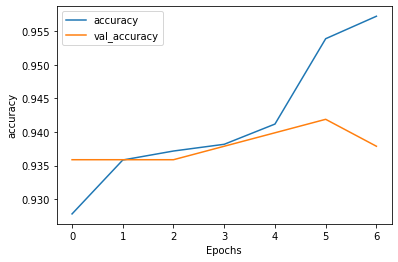

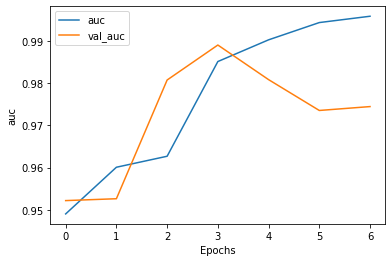

[[  0  12  12]
 [  0  12  27]
 [  0  10 924]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.35      0.31      0.33        39
           2       0.96      0.99      0.97       934

    accuracy                           0.94       997
   macro avg       0.44      0.43      0.43       997
weighted avg       0.91      0.94      0.93       997



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
################################
#*** Treatment---> Case Bi_LSTM
###############################

#'Bi_LSTM', 1_layer_GRU, 1_layer_LSTM
choise_model='Bi_LSTM'

# model generation
(model_tf,history_tf)=treatment_case_tensorflow(sentences,labels,choise_model,tokenizer,dico_params)

# plot history graphs history for metrics accuracy and AUC
plot_graphs_history(history_tf, 'accuracy')
plot_graphs_history(history_tf, 'auc')
#plot_graphs_history(history_tf, 'loss')

# evaluation
evaluate_model_tf(model_tf,X_test_for_htest,df_htest,dico_params,tokenizer)

### Evaluation <u>with</u> RandomOverSampler operation

In [ ]:
# Without ROS RandomOverSampler
# ===> i_ROS_op=True
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=7,i_ROS_op=True)

In [ ]:
X.shape

(11217, 1)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 120, 16)           160000    
                                                                 
 dropout_49 (Dropout)        (None, 120, 16)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dropout_50 (Dropout)        (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 24)                1560      
                                                                 
 dropout_51 (Dropout)        (None, 24)                0         
                                                     

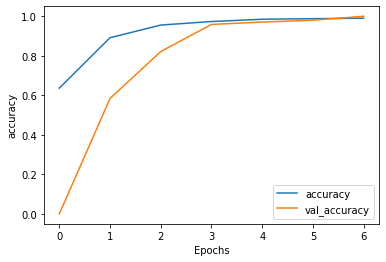

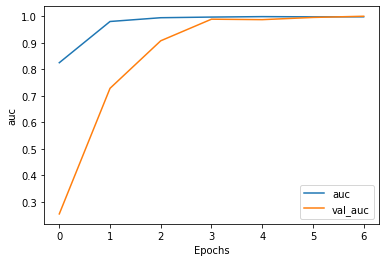

[[ 11   5   8]
 [  3  19  17]
 [  3  27 904]]
              precision    recall  f1-score   support

           0       0.65      0.46      0.54        24
           1       0.37      0.49      0.42        39
           2       0.97      0.97      0.97       934

    accuracy                           0.94       997
   macro avg       0.66      0.64      0.64       997
weighted avg       0.94      0.94      0.94       997



In [ ]:
################################
#*** Treatment---> Case Bi_LSTM
###############################

#'Bi_LTSM', 1_layer_GRU, 1_layer_LSTM
choise_model='Bi_LSTM'

# model generation
(model_tf,history_tf)=treatment_case_tensorflow(sentences,labels,choise_model,tokenizer,dico_params)

# plot history graphs history for metrics accuracy and AUC
plot_graphs_history(history_tf, 'accuracy')
plot_graphs_history(history_tf, 'auc')
#plot_graphs_history(history_tf, 'loss')

# evaluation
evaluate_model_tf(model_tf,X_test_for_htest,df_htest,dico_params,tokenizer)

##**P13. Using of techniques:  Grid Search, Cross-Validation and Random Search**

Those that have given good results are XGBoost and Bidirectional LTSM Layers. Thereafter we will optimize the parameters of the models resulting from these two approaches.

### XGBoost Optimization

In [ ]:
# imblearn.over_sampling.RandomOverSampler to handle imbalanced data
# ===> i_ROS_op=True
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=5,i_ROS_op=True)

In [ ]:
# checking
len(X),len(sentences),len(labels)

(11217, 11217, 11217)

In [ ]:
# Data preparation for fit()
y=pd.Series(labels)
if isinstance(X, pd.core.frame.DataFrame):
  X=X['reviews_title_text'] # X must be Series for train after
Xtest_h=X_test_for_htest['reviews_title_text']
ytest_h=df_htest['sentiment']
#
Xtest_h.shape,ytest_h.shape,y.shape
#
# Split() X.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test

# Tf-idf operation
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_ROS = TfidfVectorizer()
#
# conversion of reviews in Tf-Idf score
X_train_tfidf = tf_idf_ROS.fit_transform(X_train)
X_test_tfidf=tf_idf_ROS.transform(X_test)
#print('X_test_tfidf.shape=',X_test_tfidf.shape)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

#
model_xgb = XGBClassifier(n_splits=10,learning_rate =0.1, n_estimators=1000,
                            max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,
                              colsample_bytree=0.8,objective= 'binary:logistic',
                                scale_pos_weight=1,seed=27)

tuned_parameters={ 'learning_rate' : [0.20],  # [0.05,0.10,0.15,0.20,0.25,0.30]
                    'max_depth' : [ 6], # [ 3, 4, 5, 6, 8, 10, 12, 15]
                      'min_child_weight' : [ 1], # [ 1, 3, 5, 7 ]
                        'gamma': [ 0.1], # [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
                          'colsample_bytree' : [ 0.7 ],  # [ 0.3, 0.4, 0.5 , 0.7, 0.8,0.9]
                            'scale_pos_weight' : [1]      #[1,2,3]

                  }

#
CV_xgb=RandomizedSearchCV(cv=5, error_score='raise', estimator=model_xgb, param_distributions=tuned_parameters,n_jobs=2,
                                   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',   
                                       scoring=None, verbose=0)
 
#
CV_xgb.fit(X_train_tfidf, y_train)

CV_xgb.best_params_
#
fit_and_evaluate_model(CV_xgb,X_train_tfidf,X_test_tfidf,y_train,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


[[927   0   0]
 [  0 949   0]
 [  2  14 913]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       0.99      1.00      0.99       949
           2       1.00      0.98      0.99       929

    accuracy                           0.99      2805
   macro avg       0.99      0.99      0.99      2805
weighted avg       0.99      0.99      0.99      2805



RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                           n_estimators=1000, n_splits=10,
                                           nthread=4, seed=27, subsample=0.8),
                   n_jobs=2,
                   param_distributions={'colsample_bytree': [0.7],
                                        'gamma': [0.1], 'learning_rate': [0.2],
                                        'max_depth': [6],
                                        'min_child_weight': [1],
                                        'nthread': [10],
                                        'scale_pos_weight': [1]},
                   return_train_score='warn')

In [ ]:
CV_xgb.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.1,
 'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 1,
 'nthread': 10,
 'scale_pos_weight': 1}

In [ ]:
#fit_and_evaluate_model(model_xgb_ROS,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model_data_h(CV_xgb,tf_idf_ROS,Xtest_h,ytest_h)

[[ 13   3   8]
 [  2  16  21]
 [  2   8 924]]
              precision    recall  f1-score   support

           0       0.76      0.54      0.63        24
           1       0.59      0.41      0.48        39
           2       0.97      0.99      0.98       934

    accuracy                           0.96       997
   macro avg       0.78      0.65      0.70       997
weighted avg       0.95      0.96      0.95       997



In [29]:
 # XGBoost
'''
{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'scale_pos_weight': 1}
'''
#
from xgboost import XGBClassifier

model_xgb_ROS = XGBClassifier(
  n_splits=10,
  learning_rate =0.1,
  n_estimators=1000,
  max_depth=7,
  min_child_weight=1,
  gamma=0.2,
  subsample=0.8,
  colsample_bytree=0.7,
  objective= 'binary:logistic',
  scale_pos_weight=1,
  seed=27)

fit_and_evaluate_model(model_xgb_ROS,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model_data_h(model_xgb_ROS,tf_idf_ROS,Xtest_h,ytest_h)

[[927   0   0]
 [  0 949   0]
 [  3  13 913]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       927
           1       0.99      1.00      0.99       949
           2       1.00      0.98      0.99       929

    accuracy                           0.99      2805
   macro avg       0.99      0.99      0.99      2805
weighted avg       0.99      0.99      0.99      2805

[[ 14   2   8]
 [  2  15  22]
 [  1   6 927]]
              precision    recall  f1-score   support

           0       0.82      0.58      0.68        24
           1       0.65      0.38      0.48        39
           2       0.97      0.99      0.98       934

    accuracy                           0.96       997
   macro avg       0.81      0.65      0.72       997
weighted avg       0.95      0.96      0.95       997



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

#
model_xgb = XGBClassifier(n_splits=10,learning_rate =0.1, n_estimators=1000,
                            max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,
                              colsample_bytree=0.8,objective= 'binary:logistic',
                                scale_pos_weight=1,seed=27)

tuned_parameters={ 'learning_rate' : [0.1,0.2,0.3],  # [0.05,0.10,0.15,0.20,0.25,0.30]
                    'max_depth' : [ 6,7], # [ 3, 4, 5, 6, 8, 10, 12, 15]
                      'min_child_weight' : [ 1], # [ 1, 3, 5, 7 ]
                        'gamma': [ 0.1,0.2], # [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
                          'colsample_bytree' : [ 0.7,0.8 ],  # [ 0.3, 0.4, 0.5 , 0.7, 0.8,0.9]
                            'scale_pos_weight' : [1]      #[1,2,3]

                  }

#
CV_xgb=RandomizedSearchCV(cv=5, error_score='raise', estimator=model_xgb, param_distributions=tuned_parameters,n_jobs=2,
                                   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',   
                                       scoring=None, verbose=0)
 
#
CV_xgb.fit(X_train_tfidf, y_train)

print('Best Params',CV_xgb.best_params_)
print("Best: %f using %s" % (CV_xgb.best_score_, CV_xgb.best_params_))
#


Best Params {'scale_pos_weight': 1, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}
Best: 0.994888 using {'scale_pos_weight': 1, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}


KeyboardInterrupt: ignored

In [ ]:
CV_xgb.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'scale_pos_weight': 1}

In [ ]:
#fit_and_evaluate_model(model_xgb_ROS,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model_data_h(CV_xgb,tf_idf_ROS,Xtest_h,ytest_h)

[[ 14   2   8]
 [  2  15  22]
 [  1   6 927]]
              precision    recall  f1-score   support

           0       0.82      0.58      0.68        24
           1       0.65      0.38      0.48        39
           2       0.97      0.99      0.98       934

    accuracy                           0.96       997
   macro avg       0.81      0.65      0.72       997
weighted avg       0.95      0.96      0.95       997



In [ ]:
#====================== Cross Validation

In [31]:

# k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#
# CV model
model_xgb_ROS = XGBClassifier(
  n_splits=10,
  learning_rate =0.1,
  n_estimators=1000,
  max_depth=7,
  min_child_weight=1,
  gamma=0.2,
  subsample=0.8,
  colsample_bytree=0.7,
  objective= 'binary:logistic',
  scale_pos_weight=1,
  seed=27)
kfold = KFold(n_splits=2, shuffle=True,random_state=7)
results = cross_val_score(model_xgb_ROS, X_train_tfidf, y_train, cv=kfold, scoring='r2')
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Accuracy: 97.74% (0.29%)


In [ ]:
'''
>>> from sklearn import svm, cross_validation, datasets
>>> iris = datasets.load_iris()
>>> X, y = iris.data, iris.target
>>> model = svm.SVC()
>>> cross_validation.cross_val_score(model, X, y, scoring='wrong_choice')
Traceback (most recent call last):
ValueError: 'wrong_choice' is not a valid scoring value. Valid options are ['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'precision', 'r2', 'recall', 'roc_auc']
'''


In [ ]:
results

array([0.9976247 , 0.99524941, 0.99762188, 0.99524376, 0.99643282,
       0.99762188, 0.99167658, 0.99524376, 0.9940547 , 0.99643282])

### Bidirectional LTSM Layers Optimization

GridSearchCV

In [ ]:
sentences,labels,X,X_test,df_htest=init_data_treatment(i_txt_process=1,i_epoch=7,i_ROS_op=True)

In [36]:
X.shape

(11217, 1)

Searching the Best Optimizer by GridSearchCV

In [53]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

#model_tf.compile(loss='binary_crossentropy', optimizer = Adam_def, metrics=['accuracy','AUC'])

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
  
  # create model
  l_model_tf = Sequential()
  l_model_tf=get_model_tf(choise_model,dico_params)

  # Compile model
  l_model_tf.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy','AUC'])

  return l_model_tf


# create model
model_tf = KerasClassifier(build_fn=create_model, epochs=2, batch_size=10, verbose=0)

# define the grid search parameters
optimizer = ['Adagrad', 'Adadelta', 'Adam', 'Nadam'] # ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

# Def grid param
param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model_tf, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(training_padded, training_labels)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 120, 16)           160000    
                                                                 
 dropout_18 (Dropout)        (None, 120, 16)           0         
                                                                 
 bidirectional_6 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 24)                1560      
                                                                 
 dropout_20 (Dropout)        (None, 24)                0         
                                                      

Test with optimizer = 'Nadam'

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 dropout_6 (Dropout)         (None, 120, 16)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 24)                1560      
                                                                 
 dropout_8 (Dropout)         (None, 24)                0         
                                                      

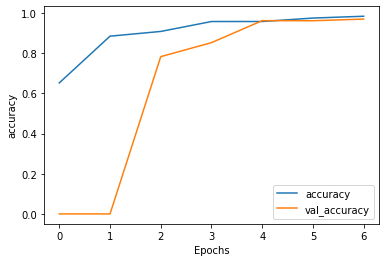

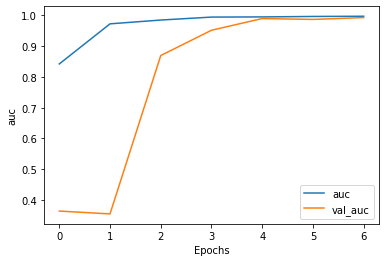

[[ 10   4  10]
 [  2  16  21]
 [  3  17 914]]
              precision    recall  f1-score   support

           0       0.67      0.42      0.51        24
           1       0.43      0.41      0.42        39
           2       0.97      0.98      0.97       934

    accuracy                           0.94       997
   macro avg       0.69      0.60      0.64       997
weighted avg       0.94      0.94      0.94       997



In [37]:
#================================= Test avec optimizer = 'Nadam'

# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
################################
#*** Treatment---> Case Bi_LSTM
###############################

#'Bi_LSTM', 1_layer_GRU, 1_layer_LSTM
choise_model='Bi_LSTM'

# model generation
#(model_tf,history_tf)=treatment_case_tensorflow3(sentences,labels,choise_model,tokenizer,dico_params)
'''
Adam_def=tf.keras.optimizers.Adam(
  learning_rate=0.01,
  beta_1=0.8,
  beta_2=0.8,
  epsilon=1e-07,
  amsgrad=False,
  name='Adam1'
)

SGD_def=tf.keras.optimizers.SGD(
  learning_rate=0.03,
  momentum=0.06,
  nesterov=False,
  name='SGD1'
)
'''
# Train the model --> Appel de treatment_case_tensorflow_without_fit()
training_padded, training_labels, testing_padded, testing_labels = treatment_case_tensorflow_without_fit(sentences,labels,choise_model,tokenizer,dico_params)
model_tf=get_model_tf(choise_model,dico_params)

# model_tf.compile(loss='binary_crossentropy', optimizer = Adam_def, metrics=['accuracy','AUC'])
model_tf.compile(loss='binary_crossentropy', optimizer = 'Nadam', metrics=['accuracy','AUC'])

history_tf = model_tf.fit(training_padded, training_labels, epochs=dico_params.get('NUM_EPOCHS'), validation_data=(testing_padded, testing_labels))

# plot history graphs history for metrics accuracy and AUC
plot_graphs_history(history_tf, 'accuracy')
plot_graphs_history(history_tf, 'auc')
#plot_graphs_history(history_tf, 'loss')

# evaluation
evaluate_model_tf(model_tf,X_test_for_htest,df_htest,dico_params,tokenizer)

GridSearchCV

In [ ]:
sentences,labels,X,X_test,df_htest=init_data_treatment(i_txt_process=2,i_epoch=7,i_ROS_op=True)

In [ ]:
#####################################
#####################################
"""# Optimization"""

#*********************************
#*** Treatment Tensorflow cas optimization
#*********************************
#
from tensorflow.keras.preprocessing.sequence import pad_sequences
#

#'Bi_LSTM', 1_layer_GRU, 1_layer_LSTM
choise_model='Bi_LSTM'

# model generation
(X_tf,y_tf,X_test_ft,y_test_tf) = treatment_case_tensorflow_without_fit(sentences,labels,choise_model,tokenizer,dico_params)

# Use scikit-learn to grid search the learning rate and momentum
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import SGD

# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.02, beta_1=0.9, beta_2=0.999):
  # create model
  l_model = Sequential()
  # l_model = get_def_model_tf(choise_model,dico_params)
  l_model = get_def_model_tf('Bi_LSTM', dico_params)


  # Compile model
  #l_optimizer = tf.keras.optimizers.SGD(learning_rate=learn_rate, momentum=momentum)
  l_optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
  #
  l_model.compile(loss='binary_crossentropy', optimizer=l_optimizer, metrics=['accuracy','AUC'])  # accuracy

  return l_model

# fix random seed for reproducibility
seed = 195
numpy.random.seed(seed)


# create model
model = KerasClassifier(build_fn=create_model, epochs=7, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.02,0.03]    #[0.001, 0.01, 0.1, 0.2, 0.3]
beta_1 =  [0.8,0.9]      #[0.0, 0.2, 0.4,0.5, 0.6, 0.7,0.8, 0.9]
beta_2 =  [0.999]
#
param_grid = dict(learn_rate=learn_rate, beta_1=beta_1, beta_2=beta_2)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_tf, y_tf)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
sentences,labels,X,X_test,df_htest=init_data_treatment(i_txt_process=1,i_epoch=7,i_ROS_op=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 120, 16)           160000    
                                                                 
 dropout_15 (Dropout)        (None, 120, 16)           0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 24)                1560      
                                                                 
 dropout_17 (Dropout)        (None, 24)                0         
                                                      

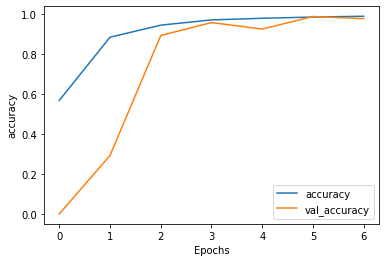

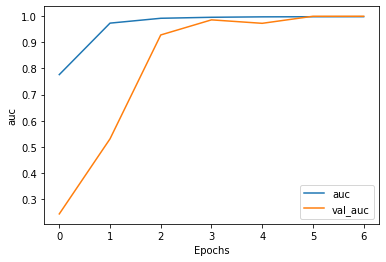

[[ 10   5   9]
 [  2  16  21]
 [  3  19 912]]
              precision    recall  f1-score   support

           0       0.67      0.42      0.51        24
           1       0.40      0.41      0.41        39
           2       0.97      0.98      0.97       934

    accuracy                           0.94       997
   macro avg       0.68      0.60      0.63       997
weighted avg       0.94      0.94      0.94       997



In [43]:
#================================= Test avec optimizer = 'Nadam'

# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

################################
#*** Treatment---> Case Bi_LSTM

#'Bi_LSTM', 1_layer_GRU, 1_layer_LSTM
choise_model='Bi_LSTM'

# Train the model --> Appel de treatment_case_tensorflow_without_fit()
training_padded, training_labels, testing_padded, testing_labels = treatment_case_tensorflow_without_fit(sentences,labels,choise_model,tokenizer,dico_params)
model_tf=get_model_tf(choise_model,dico_params)
#

#*********
optimizer_Nadam = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
#*********

model_tf.compile(loss='binary_crossentropy', optimizer = optimizer_Nadam, metrics=['accuracy','AUC'])

history_tf = model_tf.fit(training_padded, training_labels, epochs=dico_params.get('NUM_EPOCHS'), validation_data=(testing_padded, testing_labels))

# plot history graphs history for metrics accuracy and AUC
plot_graphs_history(history_tf, 'accuracy')
plot_graphs_history(history_tf, 'auc')
#plot_graphs_history(history_tf, 'loss')

# evaluation
evaluate_model_tf(model_tf,X_test_for_htest,df_htest,dico_params,tokenizer)

# **V- Topic Modeling:**

In [91]:
import scipy as sp;
import sklearn;
import sys;
from nltk.corpus import stopwords;
import nltk;
from gensim.models import ldamodel
import gensim.corpora;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle;

all_reviews  = df["reviews.text"].astype('str').tolist()
all_reviews = [text_processing2(cleanText(doc)).split() for doc in all_reviews]

#number of topics we will cluster for: num_topics=10 and num_topn=15
num_topics = 8
num_topn=12

## **P14. Identification of similar clusters by: Latent Dirchlette Allocation LDA scikit-learn technique**

In [93]:
# --- Case LDA

# list of topn words by category
# generate dataframe
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = num_topn);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);
#----------------------

id2word = gensim.corpora.Dictionary(all_reviews);

corpus = [id2word.doc2bow(text) for text in all_reviews];

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics);

# generating topics
df_t=get_lda_topics(lda, num_topics)
df_t


,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08
0,love,tablet,echo,great,love,love,kindl,use
1,great,great,tablet,amazon,one,bought,tablet,great
2,use,good,love,music,use,tablet,love,love
3,echo,use,great,use,purchas,like,great,easi
4,alexa,easi,use,play,bought,use,one,product
5,amazon,love,get,video,got,set,fire,read
6,show,price,devic,alexa,tablet,nice,old,bought
7,like,kid,amazon,product,new,play,bought,alexa
8,tablet,screen,need,app,realli,good,use,light
9,one,would,buy,love,enjoy,time,read,work


## **P15. Identification of similar clusters by: Non-Negative Matrix Factorization NMF scikit-learn technique**

In [94]:
# --- Case NMF

# list of topn words by category
# generate dataframe
def get_nmf_topics(model, n_top_words):
    
    # the word ids obtained need to be reverse-mapped to the words
    # so we can print the topic names.
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        # for each topic, obtain the largest values, 
        # and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-num_topn - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);
#------------------------

train_headlines_sentences = [' '.join(text) for text in all_reviews]

vectorizer = CountVectorizer(analyzer='word', max_features=5000);
x_counts = vectorizer.fit_transform(train_headlines_sentences);

transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

model = NMF(n_components=num_topics, init='nndsvd');

# fit the model
model.fit(xtfidf_norm)

# generating topics
df_t=get_nmf_topics(model, num_topn)
df_t

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08
0,great,love,easi,tablet,echo,good,old,kindl
1,work,bought,use,kid,alexa,product,year,read
2,price,gift,set,price,show,recommend,grandson,book
3,product,daughter,product,need,music,would,bought,fire
4,kid,son,fun,app,home,price,perfect,game
5,gift,absolut,setup,perfect,like,friend,purchas,like
6,sound,christma,super,game,one,buy,one,replac
7,valu,got,learn,nice,plus,qualiti,christma,play
8,well,granddaught,navig,amazon,amazon,high,enjoy,size
9,camera,kid,problem,daughter,light,excel,son,one


# **FUNCTIONS & INITIALIZATION**

In [12]:
def reinit_input_df():
  l_df=df_init.copy(deep=True)
  l_df_htest=df_htest_init.copy(deep=True)
  l_df_test=df_test_init.copy(deep=True)
  return l_df,l_df_htest,l_df_test

In [13]:
def fc_mapping(i_x):
  r_value=0
  if i_x=='Positive':
    r_value=2
  else:
    if i_x=='Neutral':
      r_value=1
    else:
      if i_x=='Negative':
        r_value=0
      else:
        r_value=i_x
  #
  return r_value

In [14]:
def retraite_df(i_df, i_level_review=0, i_fusion_reviews_title_text=True):
  #
  l_df=i_df
  l_sentences=[]
  # rename(): reviews.title ------> reviews_title
  l_df.rename(columns={'reviews.title': 'reviews_title'}, inplace=True)
  l_df.rename(columns={'reviews.text': 'reviews_text'}, inplace=True)
  # drop rows
  l_df.dropna()
  l_indexNames = l_df[ (l_df['reviews_title'].isna()) | (l_df['reviews_text'].isna()) ].index    # 
  l_df.drop(l_indexNames , inplace=True)
  #
  # mapping values of sentiment colomn
  if 'sentiment' in l_df.columns:
    l_df['sentiment'] = l_df['sentiment'].apply(fc_mapping)
  #
  if i_fusion_reviews_title_text:
    l_sentences=np.array(l_df.reviews_title.astype(str))+'. '+ np.array(l_df.reviews_text.astype(str))
    if i_level_review==1:
      l_sentences=np.array(l_df.reviews_text.astype(str))
    #
    if i_level_review==2:
      l_sentences=np.array(l_df.reviews_title.astype(str))
    #
    l_sentences=list(l_sentences)
    l_df['reviews_title_text']=l_sentences
    l_sentences=[]
  return l_df


In [15]:
##########################################
### Evaluation function No tensorflow model 
##########################################
# Used to Evaluate models
from sklearn.metrics import confusion_matrix, classification_report
#
def fit_and_evaluate_model(i_model,i_X_train,i_X_test,i_y_train,i_y_test):
  #
  l_model=i_model
  l_model.fit(i_X_train, i_y_train)
  l_ypred = l_model.predict(i_X_test)

  print(confusion_matrix(i_y_test, l_ypred))
  print(classification_report(i_y_test, l_ypred))

  return l_model

In [16]:
# Evaluate Hidden Data
# i_transformer(i_Xtest_h) in order to_predict()
def evaluate_model_data_h(i_model,i_transformer,i_Xtest_h,i_ytest_h):
  #
  l_model=i_model
  l_Xtest_h=i_transformer.transform(i_Xtest_h)
  l_ypred = l_model.predict(l_Xtest_h)

  print(confusion_matrix(i_ytest_h, l_ypred))
  print(classification_report(i_ytest_h, l_ypred))

  return None

In [17]:
# Plot history graph 
def plot_graphs_history(i_history, i_metric_str):
  plt.plot(i_history.history[i_metric_str])
  plt.plot(i_history.history['val_'+i_metric_str])
  plt.xlabel("Epochs")
  plt.ylabel(i_metric_str)
  plt.legend([i_metric_str, 'val_'+i_metric_str])
  plt.show()
  return None

In [18]:
def get_params_input_toPredict(i_df_for_sequences,i_df_for_labels, i_dico_params, i_tokenizer):
  #
  l_sentences=list(i_df_for_sequences.reviews_title_text)
  l_labels=list(i_df_for_labels.sentiment)
  #
  # Generate and pad the training sequences
  l_sentences = i_tokenizer.texts_to_sequences(l_sentences)
  l_seq_padded = pad_sequences(l_sentences, maxlen=i_dico_params.get('max_length'), padding=i_dico_params.get('padding_type'), truncating=i_dico_params.get('trunc_type'))

  # Convert the labels lists into numpy arrays
  l_labels = np.array(l_labels)
  np_utils.to_categorical(l_labels, i_dico_params.get('nb_classes'))

  #
  return l_seq_padded,l_labels    # sequences ou sentences

In [19]:
##################################
### Evaluation tensorflow model
##################################
from sklearn.metrics import confusion_matrix, classification_report
#
def evaluate_model_tf(i_model,i_df_for_sequences,i_df_for_labels, i_dico_params, i_tokenizer):
  Xpad,ylab=get_params_input_toPredict(i_df_for_sequences,i_df_for_labels,i_dico_params, i_tokenizer)
  ylab_pred=i_model.predict(Xpad)
  ylab_pred_lst=[np.argmax(ylab_pred[i,:]) for i in range(len(ylab_pred))]
  print(confusion_matrix(ylab, ylab_pred_lst))
  print(classification_report(ylab, ylab_pred_lst))

In [20]:
import numpy as np
import tensorflow as tf
from keras.layers.core import Dense, Dropout, Activation

def get_model_tf(i_key_model,i_dico_params):
  #
  tf.random.set_seed=195
  # Parameters
  nb_classes=i_dico_params.get('nb_classes')
  embedding_dim = i_dico_params.get('embedding_dim')
  lstm_dim = i_dico_params.get('lstm_dim')
  dense_dim = i_dico_params.get('dense_dim')
  vocab_size = i_dico_params.get('vocab_size')
  max_length = i_dico_params.get('max_length')

  # Model Definition with LSTM
  if i_key_model=='Bi_LSTM':
    l_model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Dropout(rate=0.4, seed=195),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
        tf.keras.layers.Dropout(rate=0.6, seed=195),
        tf.keras.layers.Dense(dense_dim, activation='relu'),
        #tf.keras.layers.Dense(1, activation='sigmoid')
        tf.keras.layers.Dropout(rate=0.4),
        tf.keras.layers.Dense(nb_classes, activation='softmax')
    ])
  #
  if i_key_model=='1_layer_LSTM':
    l_model = tf.keras.Sequential()
    l_model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
    l_model.add(tf.keras.layers.Dropout(rate=0.4, seed=195))
    l_model.add(tf.keras.layers.LSTM(2*lstm_dim))
    l_model.add(tf.keras.layers.Dropout(rate=0.6, seed=195))
    l_model.add(tf.keras.layers.Dense(nb_classes))
    l_model.add(Activation('softmax'))
  #
  if i_key_model=='1_layer_GRU':
    l_model = tf.keras.Sequential()
    l_model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
    l_model.add(tf.keras.layers.Dropout(rate=0.4, seed=195))
    l_model.add(tf.keras.layers.GRU(120))
    l_model.add(tf.keras.layers.Dropout(rate=0.6, seed=195))
    l_model.add(tf.keras.layers.Dense(nb_classes))
    l_model.add(Activation('softmax'))
    #
  if i_key_model=='1_layer_Dense':
    l_model = tf.keras.Sequential()
    l_model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
    l_model.add(tf.keras.layers.Dropout(rate=0.4, seed=195))
    l_model.add(tf.keras.layers.Dense(10*nb_classes))
    l_model.add(tf.keras.layers.Dropout(rate=0.6, seed=195))
    l_model.add( tf.keras.layers.Flatten())
    l_model.add(tf.keras.layers.Dense(nb_classes))
    l_model.add(Activation('softmax'))

  # Set the training parameters
  l_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','AUC']) 
  # tf.keras.metrics.AUC(),metrics=['accuracy','AUC']

  # Print the model summary
  l_model.summary()
  #
  return l_model


In [21]:
#*********************************
#*** Treatment Tensorflow
#*********************************
#
from tensorflow.keras.preprocessing.sequence import pad_sequences
#
def treatment_case_tensorflow(i_sentences,i_labels,i_key_model,i_tokenizer,i_dico_params):

  tf.random.set_seed=195
  #---------------------
  #-----Split operation
  #---------------------
  ratio_training=75/100
  training_size=int(len(i_sentences)*ratio_training)

  # Split the sentences
  training_sentences = i_sentences[0:training_size]
  testing_sentences = i_sentences[training_size:]

  # Split the labels
  training_labels = i_labels[0:training_size]
  testing_labels = i_labels[training_size:]

  #---------------------
  #-----Padding operation
  #---------------------
  #

  # Generate the word index dictionary
  i_tokenizer.fit_on_texts(training_sentences)
  word_index = tokenizer.word_index

  # Generate and pad the training sequences
  training_sequences = i_tokenizer.texts_to_sequences(training_sentences)
  training_padded = pad_sequences(training_sequences, maxlen=i_dico_params.get('max_length'), padding=i_dico_params.get('padding_type'), 
                                                                        truncating=i_dico_params.get('trunc_type'))

  # Generate and pad the testing sequences
  testing_sequences = i_tokenizer.texts_to_sequences(testing_sentences)
  testing_padded = pad_sequences(testing_sequences, maxlen=i_dico_params.get('max_length'), padding=i_dico_params.get('padding_type'), 
                                                                                truncating=i_dico_params.get('trunc_type'))

  # Convert the labels lists into numpy arrays
  training_labels = np.array(training_labels)
  testing_labels = np.array(testing_labels)

  # One-Hot Encoding of y_train and y_test
  from keras.utils import np_utils
  nb_classes=3
  #
  training_padded1=training_padded
  testing_padded1=training_padded
  #
  training_labels1=training_labels
  testing_labels1=testing_labels
  #
  training_labels = np_utils.to_categorical(training_labels, nb_classes)
  testing_labels = np_utils.to_categorical(testing_labels, nb_classes)


  # Train the model
  l_model=get_model_tf(i_key_model,i_dico_params)
  l_history = l_model.fit(training_padded, training_labels, epochs=i_dico_params.get('NUM_EPOCHS'), validation_data=(testing_padded, testing_labels))

  return (l_model,l_history)

In [22]:
import string
from nltk.corpus import stopwords
#
import nltk
nltk.download('stopwords')
#

def text_processing(i_text):
    
    #Takes in a string of text, then performs the following:
    #1. Remove all punctuation 2. Remove all stopwords
    #3. Return the cleaned text as a list of words
    
    l_txt=i_text
    l_txt = [char for char in i_text if char not in string.punctuation]
    l_txt = ''.join(l_txt)
    #[word.lower() for word in l_txt.split() if word.lower() not in stopwords.words('english')]
    #l_txt = ''.join(l_txt)
    
    return l_txt
    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
import string
from nltk.corpus import stopwords
#
import nltk
nltk.download('stopwords')
#

def text_processing2(i_text):

    l_txt=i_text
    l_txt = [char for char in l_txt if char not in string.punctuation]
    l_txt = ''.join(l_txt)

    l_txt = l_txt.split()
    l_txt =[word.lower() for word in l_txt]
    l_txt =' '.join(l_txt)
    
    #StopwordRemoval
    #from nltk.corpus import stopwords
    #l_txt = [word for word in l_txt if word.lower() not in stopwords.words('english')]
    #l_txt = ''.join(l_txt)
    
    return l_txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import nltk
#
nltk.download('wordnet')
nltk.download('stopwords')

def text_processing3(i_text):
    l_text = i_text.lower() # Convert to lowercase
    l_words = l_text.split() # Tokenize
    l_words = [w for w in l_words if not w in stopwords.words('english')] # Removing stopwords

    # Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        l_words = [WordNetLemmatizer.lemmatize(x, pos) for x in l_words]
    return " ".join(l_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
from bs4 import BeautifulSoup
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import re
def text_processing4(raw_text, remove_stopwords=True, stemming=True, split_text=False ):

    text = BeautifulSoup(raw_text, 'lxml').get_text()  # remove htm
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-char
    words = letters_only.lower().split() #  to lower  
    
    # remove stopword
    if remove_stopwords: 
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
        # stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:
        return (words)
    
    return( " ".join(words))

In [31]:
# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
#
def ROS_operation(i_X,i_Y):
  ros = RandomOverSampler(random_state=0) 
  l_X,l_Y=ros.fit_resample(i_X,i_Y)
  print("X_result.shape,Y_result.shape", l_X.shape , l_Y.shape)
  return l_X, l_Y

In [25]:
########################################
### init_data(i_txt_process,i_ROS_op=True)
# i_txt_process=1 ==> text_processing
# i_txt_process=2 ==> text_processing2
########################################
def init_data_treatment(i_txt_process=1,i_epoch=7,i_ROS_op=True):

  # Initial data
  df,df_htest,df_test=reinit_input_df()
  print('df.shape,df_htest.shape,df_test.shape')
  print(df.shape,df_htest.shape,df_test.shape,'\n')

  #i_fusion_reviews_title_text=True
  #
  #level_review=
  #               0:reviews_text+'. '+reviews_title
  #               1: reviews_text
  #               2: reviews_title
  level_review=0
  #
  df=retraite_df(df,i_level_review=level_review)
  df_htest=retraite_df(df_htest,i_level_review=level_review,i_fusion_reviews_title_text=False)  # reviews_title_text not necessary
  df_test=retraite_df(df_test,i_level_review=level_review)
  #
  df.info(),df_htest.info(),df_test.info()

  # X, X_test, Y
  X=pd.DataFrame(df['reviews_title_text'])
  X_test=pd.DataFrame(df_test['reviews_title_text'])
  #
  # treatment text
  if i_txt_process==1:
    X=pd.DataFrame(df['reviews_title_text'].apply(text_processing))
    X_test=pd.DataFrame(df_test['reviews_title_text'].apply(text_processing))
  #
  if i_txt_process==2:
    X=pd.DataFrame(df['reviews_title_text'].apply(text_processing2))
    X_test=pd.DataFrame(df_test['reviews_title_text'].apply(text_processing2))
  #
  Y=df[['sentiment']]

  # RandomOverSampler to handle imbalanced data
  if i_ROS_op:
    X,Y=ROS_operation(X,Y)
    print('\nX.shape,Y.shape')
    print(X.shape,Y.shape)

  sentences=list(X.reviews_title_text)
  labels=list(Y.sentiment)
  print('\nlabels example....', 'sentences example....')
  print (labels[:10],'', sentences[4:5])

  # epochs number
  dico_params['NUM_EPOCHS']=i_epoch

  # Initialize the Tokenizer class
  print('\nInitialyzing tokenizer.... ')
  tokenizer = Tokenizer(num_words=dico_params.get('vocab_size'), oov_token=dico_params.get('oov_tok'))
  
  print('\n')
  X.info(),X_test.info()
  return sentences,labels, X, X_test,df_htest

In [26]:
# --------- For Optimization model tf
def treatment_case_tensorflow_without_fit(i_sentences,i_labels,i_key_model,i_tokenizer,i_dico_params):

  tf.random.set_seed=195
  #---------------------
  #-----Split operation
  #---------------------
  ratio_training=75/100
  training_size=int(len(i_sentences)*ratio_training)

  # Split the sentences
  training_sentences = i_sentences[0:training_size]
  testing_sentences = i_sentences[training_size:]

  # Split the labels
  training_labels = i_labels[0:training_size]
  testing_labels = i_labels[training_size:]

  #---------------------
  #-----Padding operation
  #---------------------
  #

  # Generate the word index dictionary
  i_tokenizer.fit_on_texts(training_sentences)
  word_index = tokenizer.word_index

  # Generate and pad the training sequences
  training_sequences = i_tokenizer.texts_to_sequences(training_sentences)
  training_padded = pad_sequences(training_sequences, maxlen=i_dico_params.get('max_length'), padding=i_dico_params.get('padding_type'), 
                                                                        truncating=i_dico_params.get('trunc_type'))

  # Generate and pad the testing sequences
  testing_sequences = i_tokenizer.texts_to_sequences(testing_sentences)
  testing_padded = pad_sequences(testing_sequences, maxlen=i_dico_params.get('max_length'), padding=i_dico_params.get('padding_type'), 
                                                                                truncating=i_dico_params.get('trunc_type'))

  # Convert the labels lists into numpy arrays
  training_labels = np.array(training_labels)
  testing_labels = np.array(testing_labels)

  # One-Hot Encoding of y_train and y_test
  from keras.utils import np_utils
  nb_classes=3
  #
  training_padded1=training_padded
  testing_padded1=training_padded
  #
  training_labels1=training_labels
  testing_labels1=testing_labels
  #
  training_labels = np_utils.to_categorical(training_labels, nb_classes)
  testing_labels = np_utils.to_categorical(testing_labels, nb_classes)

  return training_padded, training_labels, testing_padded, testing_labels


In [32]:
import numpy as np
import tensorflow as tf
#from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
#
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from xgboost import XGBClassifier


# Global varibales
X=df
X_test=df_test
#
Y=df[['sentiment']]
#

# sentences, labels
sentences=[]
labels=[]

dico_params={
      #l_dico=dict()
      'nb_classes':3,
      'lstm_dim':32,
      'embedding_dim':16,
      'dense_dim':24,
      #
      'vocab_size':10000,
      'max_length':120,
      'trunc_type':'post',
      'padding_type':'post',
      'oov_tok': "<OOV>",
      'NUM_EPOCHS':7
        }
def get_dico_params():
  return dico_params
#
# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=dico_params.get('vocab_size'), oov_token=dico_params.get('oov_tok'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
#======== Final Step Initialization =============#

In [ ]:
# Without ROS RandomOverSampler
# ===> i_ROS_op=False
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=12,i_ROS_op=False)

In [ ]:
# Without ROS RandomOverSampler
# ===> i_ROS_op=True
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=12,i_ROS_op=True)

In [36]:
# Checking
X.shape

(3990, 1)

In [37]:
# Data preparation for fit()
y=pd.Series(labels)
if isinstance(X, pd.core.frame.DataFrame):
  X=X['reviews_title_text'] # X must be Series for train after
Xtest_h=X_test_for_htest['reviews_title_text']
ytest_h=df_htest['sentiment']
#
Xtest_h.shape,ytest_h.shape,y.shape
#
# Split() X.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test

# Tf-idf operation
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_ROS = TfidfVectorizer()
#
# conversion of reviews in Tf-Idf score
X_train_tfidf = tf_idf_ROS.fit_transform(X_train)
X_test_tfidf=tf_idf_ROS.transform(X_test)
#print('X_test_tfidf.shape=',X_test_tfidf.shape)

#**=================================================================**

# TEST

In [ ]:
#------------------------Debut preparation --------------------------#

In [ ]:
sentences,labels,X,X_test_for_htest,df_htest=init_data_treatment(i_txt_process=2,i_epoch=5,i_ROS_op=True)

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X_test_for_htest.shape,df_htest.shape

((997, 1), (997, 8))

In [ ]:
y=pd.Series(labels)
if isinstance(X, pd.core.frame.DataFrame):
  X=X['reviews_title_text'] # X must be Series for train after
Xtest_h=X_test_for_htest['reviews_title_text']
ytest_h=df_htest['sentiment']
#
Xtest_h.shape,ytest_h.shape,y.shape

((997,), (997,), (11217,))

In [ ]:
X_test_for_htest.head()

,reviews_title_text
0,very handy device amazon kindle fire has a lot...
1,another winner from amazon the echo show is a ...
2,simple to use and reliable so far great value ...
3,love it i use mine for email facebook games an...
4,fantastic this is a fantastic item the person ...


In [ ]:
X.head()

0    powerful tablet purchased on black fridaypros ...
1    amazon echo plus awesome i purchased two amazo...
2    average just an average alexa option does show...
3    greattttttt very good product exactly what i w...
4    very durable this is the 3rd one ive purchased...
Name: reviews_title_text, dtype: object

In [ ]:
#------------------------------ Prepa End ------------------------#

In [ ]:
# *** Using CountVectorizer .........

In [ ]:
import nltk
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
#
# next we need to vectorize our input variable (X)
#we use the count vectoriser function and the analyser we use is the above lines of code
# this should return a vector array
#bow_transformer = CountVectorizer(analyzer=text_process).fit(X)
bow_transformer = CountVectorizer().fit(X)
#
vocab=bow_transformer.vocabulary_
print('type(vocab),len(vocab)')
print(type(vocab),len(vocab)) # coding to num

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
type(vocab),len(vocab)
<class 'dict'> 5589


In [ ]:
from sklearn.model_selection import train_test_split

X_bow = bow_transformer.transform(X) # coding to num
print('X_bow.shape= ',X_bow.shape)

X_bow.shape=  (11217, 5589)


In [ ]:
# Split() X_bow.....
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.3, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7851, 5589), (3366, 5589), (7851,), (3366,))

In [ ]:
X_train.data.ndim, X_train.data.shape

(1, (240422,))

In [ ]:
# RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
#
model_rfc = RandomForestClassifier(random_state=0)
fit_and_evaluate_model(model_rfc,X_train,X_test,y_train,y_test)
evaluate_model_data_h(model_rfc,bow_transformer,Xtest_h,ytest_h)

[[1120    0    0]
 [   0 1119    0]
 [   0    0 1127]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00      1119
           2       1.00      1.00      1.00      1127

    accuracy                           1.00      3366
   macro avg       1.00      1.00      1.00      3366
weighted avg       1.00      1.00      1.00      3366

[[  7   0  17]
 [  0  10  29]
 [  0   0 934]]
              precision    recall  f1-score   support

           0       1.00      0.29      0.45        24
           1       1.00      0.26      0.41        39
           2       0.95      1.00      0.98       934

    accuracy                           0.95       997
   macro avg       0.98      0.52      0.61       997
weighted avg       0.96      0.95      0.94       997



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#
rfc=RandomForestClassifier(bootstrap=True, class_weight=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0, 
                                    min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                                            oob_score=False, random_state=0, verbose=0, warm_start=False)

tuned_parameters={'n_estimators': [200,300,400], 'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [32,64], 'criterion': ['gini', 'entropy']}

#
CV_rfc=RandomizedSearchCV(cv=5, error_score='raise', estimator=rfc, param_distributions=tuned_parameters,n_jobs=2,
                                   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',   
                                       scoring=None, verbose=0)
 
#
CV_rfc.fit(X_train, y_train)

print(CV_rfc.best_params_)
#
fit_and_evaluate_model(CV_rfc,X_train,X_test,y_train,y_test)

[[1120    0    0]
 [   0 1119    0]
 [   0    0 1127]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00      1119
           2       1.00      1.00      1.00      1127

    accuracy                           1.00      3366
   macro avg       1.00      1.00      1.00      3366
weighted avg       1.00      1.00      1.00      3366



RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(n_estimators=10, n_jobs=2,
                                                    random_state=0),
                   n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [32, 64],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 300, 400]},
                   return_train_score='warn')

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 64,
 'max_features': 'auto',
 'n_estimators': 400}

In [ ]:
model_rfc = RandomForestClassifier(random_state=10,n_estimators=400,
                    max_features='auto',criterion='entropy', max_depth=64)
fit_and_evaluate_model(model_rfc,X_train,X_test,y_train,y_test)
evaluate_model_data_h(model_gbc,bow_transformer,Xtest_h,ytest_h)


[[1120    0    0]
 [   0 1119    0]
 [   0    0 1127]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00      1119
           2       1.00      1.00      1.00      1127

    accuracy                           1.00      3366
   macro avg       1.00      1.00      1.00      3366
weighted avg       1.00      1.00      1.00      3366

[[ 12   5   7]
 [  7  17  15]
 [ 11  63 860]]
              precision    recall  f1-score   support

           0       0.40      0.50      0.44        24
           1       0.20      0.44      0.27        39
           2       0.98      0.92      0.95       934

    accuracy                           0.89       997
   macro avg       0.53      0.62      0.56       997
weighted avg       0.93      0.89      0.91       997



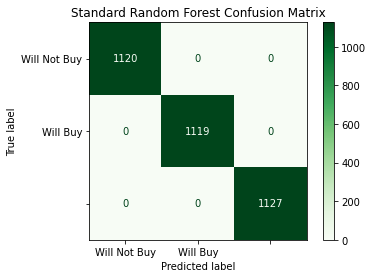

In [ ]:

#Importing essential libraries
import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

#Build SRF model
SRF = RandomForestClassifier(n_estimators=150, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate SRF model
scores = cross_validate(SRF, X, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

#Randomly spilt dataset to test and train set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
#Train SRF
SRF.fit(X_train, y_train)
#SRF prediction result
y_pred = SRF.predict(X_test)
#Create confusion matrix
fig = plot_confusion_matrix(SRF, X_test, y_test, display_labels=['Will Not Buy', 'Will Buy'], cmap='Greens')
plt.title('Standard Random Forest Confusion Matrix')
plt.show()


In [ ]:
fit_and_evaluate_model(model_rfc,X_train,X_test,y_train,y_test)
evaluate_model_data_h(SRF,bow_transformer,Xtest_h,ytest_h)

[[1120    0    0]
 [   0 1119    0]
 [   0    0 1127]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00      1119
           2       1.00      1.00      1.00      1127

    accuracy                           1.00      3366
   macro avg       1.00      1.00      1.00      3366
weighted avg       1.00      1.00      1.00      3366

[[  7   0  17]
 [  0  10  29]
 [  0   0 934]]
              precision    recall  f1-score   support

           0       1.00      0.29      0.45        24
           1       1.00      0.26      0.41        39
           2       0.95      1.00      0.98       934

    accuracy                           0.95       997
   macro avg       0.98      0.52      0.61       997
weighted avg       0.96      0.95      0.94       997



# Temp

# Optimization

In [43]:
#*********************************
#*** Treatment Tensorflow cas optimization
#*********************************
#
from tensorflow.keras.preprocessing.sequence import pad_sequences
#
def treatment_case_tensorflow2(i_sentences,i_labels,i_key_model,i_tokenizer,i_dico_params):

  #---------------------
  #-----Split operation
  #---------------------
  ratio_training=75/100
  training_size=int(len(i_sentences)*ratio_training)

  # Split the sentences
  training_sentences = i_sentences[0:training_size]
  testing_sentences = i_sentences[training_size:]

  # Split the labels
  training_labels = i_labels[0:training_size]
  testing_labels = i_labels[training_size:]

  #---------------------
  #-----Padding operation
  #---------------------
  #

  # Generate the word index dictionary
  i_tokenizer.fit_on_texts(training_sentences)
  word_index = tokenizer.word_index

  # Generate and pad the training sequences
  training_sequences = i_tokenizer.texts_to_sequences(training_sentences)
  training_padded = pad_sequences(training_sequences, maxlen=i_dico_params.get('max_length'), padding=i_dico_params.get('padding_type'), 
                                                                        truncating=i_dico_params.get('trunc_type'))

  # Generate and pad the testing sequences
  testing_sequences = i_tokenizer.texts_to_sequences(testing_sentences)
  testing_padded = pad_sequences(testing_sequences, maxlen=i_dico_params.get('max_length'), padding=i_dico_params.get('padding_type'), 
                                                                                truncating=i_dico_params.get('trunc_type'))

  # Convert the labels lists into numpy arrays
  training_labels = np.array(training_labels)
  testing_labels = np.array(testing_labels)

  # One-Hot Encoding of y_train and y_test
  from keras.utils import np_utils
  nb_classes=3
  #
  training_padded1=training_padded
  testing_padded1=training_padded
  #
  training_labels1=training_labels
  testing_labels1=testing_labels
  #
  training_labels = np_utils.to_categorical(training_labels, nb_classes)
  testing_labels = np_utils.to_categorical(testing_labels, nb_classes)


  # Train the model
  #l_model=get_model_tf(i_key_model,i_dico_params)
  #l_history = l_model.fit(training_padded, training_labels, epochs=i_dico_params.get('NUM_EPOCHS'), validation_data=(testing_padded, testing_labels))

  return training_padded,training_labels,testing_padded,testing_labels

In [ ]:
sentences,labels,X,X_test,df_htest=init_data_treatment(i_txt_process=1,i_epoch=12,i_ROS_op=True)

In [45]:

#'Bi_LTSM', 1_layer_GRU, 1_layer_LTSM
choise_model='Bi_LTSM'

# model generation
(X_tf,y_tf,X_test_ft,y_test_tf) = treatment_case_tensorflow2(sentences,labels,choise_model,tokenizer,dico_params)


In [46]:
# Use scikit-learn to grid search the learning rate and momentum
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
import numpy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.01, momentum=0):
	# create model
	l_model = Sequential()
	l_model.add(Dense(12, input_dim=8, activation='relu'))
	l_model.add(Dense(1, activation='sigmoid'))

	l_model = get_def_model_tf(choise_model,dico_params)

	# Compile model
	l_optimizer = SGD(lr=learn_rate, momentum=momentum)
	l_model.compile(loss='binary_crossentropy', optimizer=l_optimizer, metrics=['accuracy'])

	return l_model

# fix random seed for reproducibility
seed = 195
numpy.random.seed(seed)


# create model
model = KerasClassifier(build_fn=create_model, epochs=7, batch_size=10, verbose=0)
# define the grid search parameters
learn_rate = [0.1]    #[0.001, 0.01, 0.1, 0.2, 0.3]
momentum =  [ 0.9]      #[0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
#
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_tf, y_tf)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 3.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/s

NameError: ignored

In [ ]:
params

In [ ]:
from sklearn.model_selection import GridSearchCV


clf = KerasClassifier(
    model=create_model,
    loss="binary_crossentropy",
    optimizer="adam",
    optimizer__lr=0.1,
    model__hidden_layer_sizes=(100,),
    model__dropout=0.5,
    verbose=False,
)

In [ ]:
params = {
    'optimizer__lr': [0.05, 0.1],
    'model__hidden_layer_sizes': [(100, ), (50, 50, )],
    'model__dropout': [0, 0.5],
}

gs = GridSearchCV(clf, params, scoring='accuracy', n_jobs=-1, verbose=True)

gs.fit(X, y)

print(gs.best_score_, gs.best_params_)

NameError: ignored

In [ ]:
#===========================================================================================
#=========================================================================================

In [ ]:
sentences,labels,X,X_test,df_htest=init_data_treatment(i_txt_process=1,i_epoch=12,i_ROS_op=True)

In [ ]:
X.shape

(11217, 1)

# Dirichlet NMF MLD

In [38]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [40]:
len(sentences),len(data_samples)

(3990, 3990)

In [41]:
data_samples[0]

'powerful tablet purchased on black fridaypros great price even off salevery powerful and fast with quad core processors amazing soundwell builtcons amazon ads amazon need this to subsidize the tablet and will remove the adds if you pay them 15inability to access other apps except the ones from amazon there is a way which i was able to accomplish to add the google play storenet this is a great tablet for the money'

In [42]:
sentences[0]

'powerful tablet purchased on black fridaypros great price even off salevery powerful and fast with quad core processors amazing soundwell builtcons amazon ads amazon need this to subsidize the tablet and will remove the adds if you pay them 15inability to access other apps except the ones from amazon there is a way which i was able to accomplish to add the google play storenet this is a great tablet for the money'

In [43]:
print (data_samples[:100])

['powerful tablet purchased on black fridaypros great price even off salevery powerful and fast with quad core processors amazing soundwell builtcons amazon ads amazon need this to subsidize the tablet and will remove the adds if you pay them 15inability to access other apps except the ones from amazon there is a way which i was able to accomplish to add the google play storenet this is a great tablet for the money', 'amazon echo plus awesome i purchased two amazon in echo plus and two dots plus four fire sticks and the hub philips hue for lamp for the family at christmas 2017 i‚äôm so happy with these purchases and learning so much with alexa you can start your daily routine with alexa and program it to whatever you would like to include news weather music horoscope also you can start your day off with a compliment and i think is very important alexa gave me the best chili recipe i mean the best it‚äôs called chili i i want my husband to use alexa to stay organized for business dates 

Extracting tf-idf features for NMF...
done in 0.103s.
Extracting tf features for LDA...
done in 0.100s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.416s.


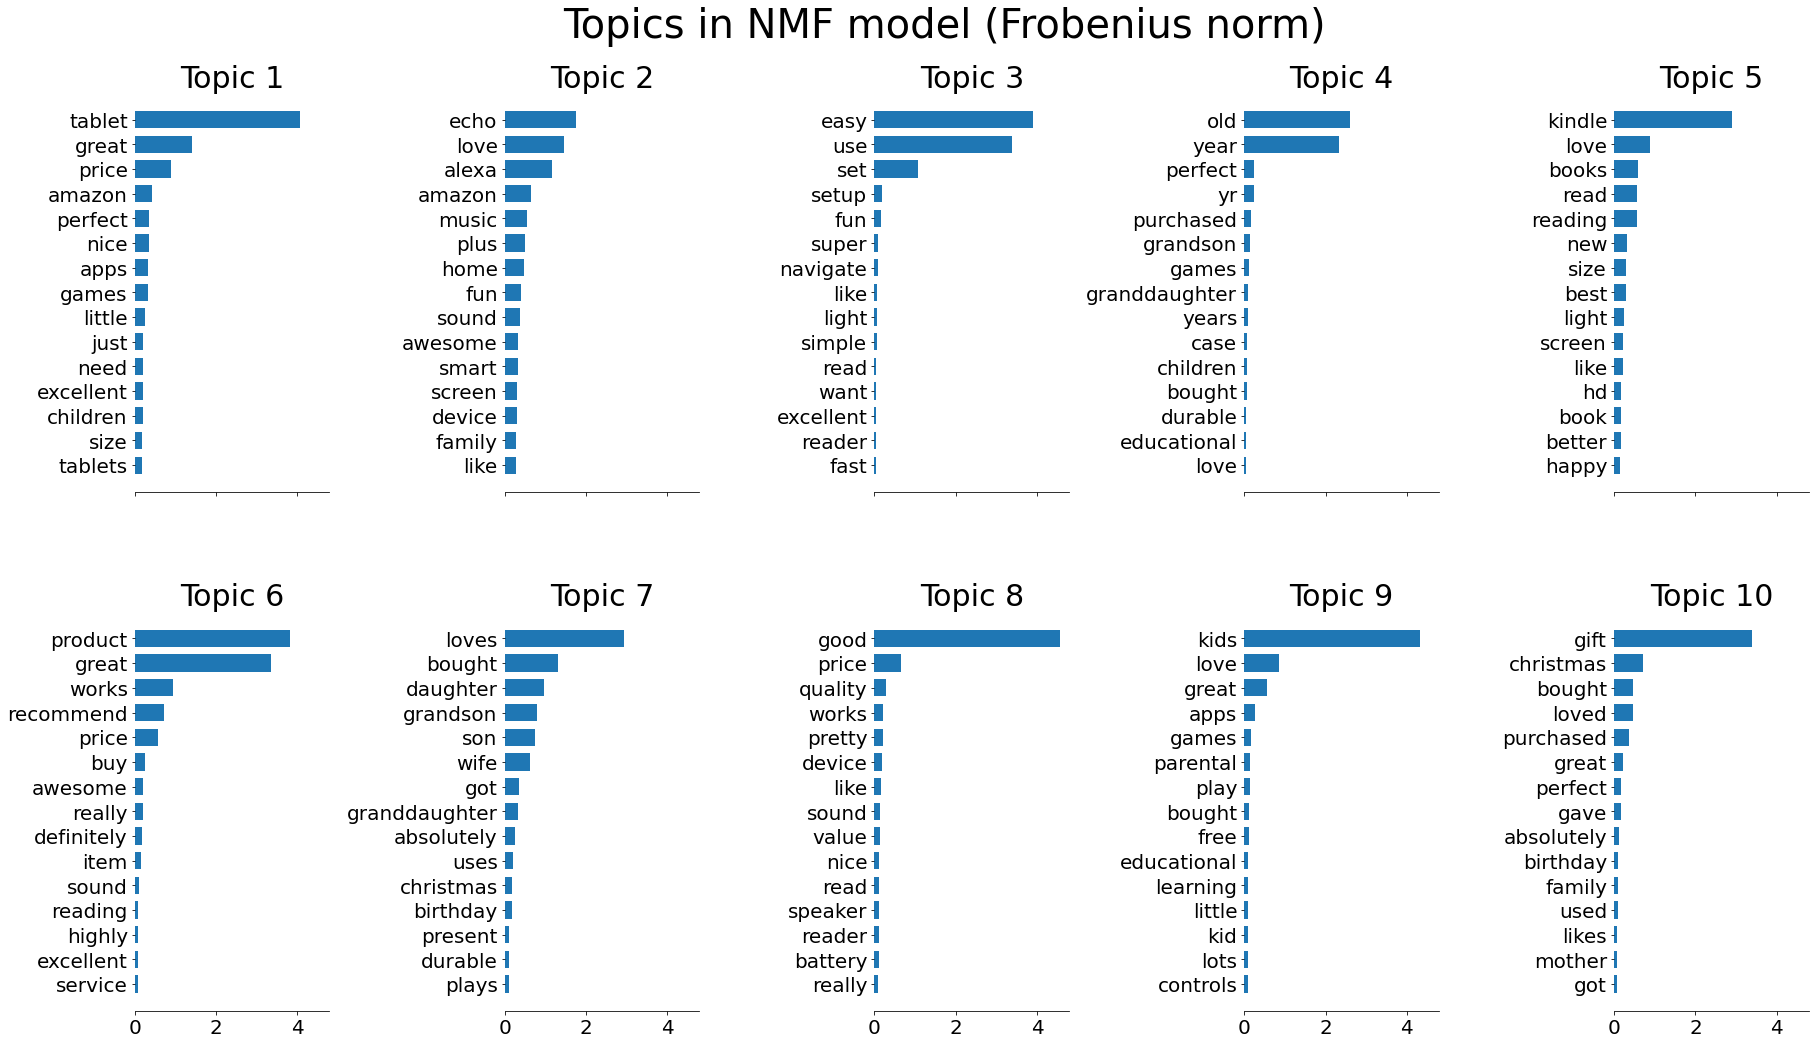



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 3.603s.


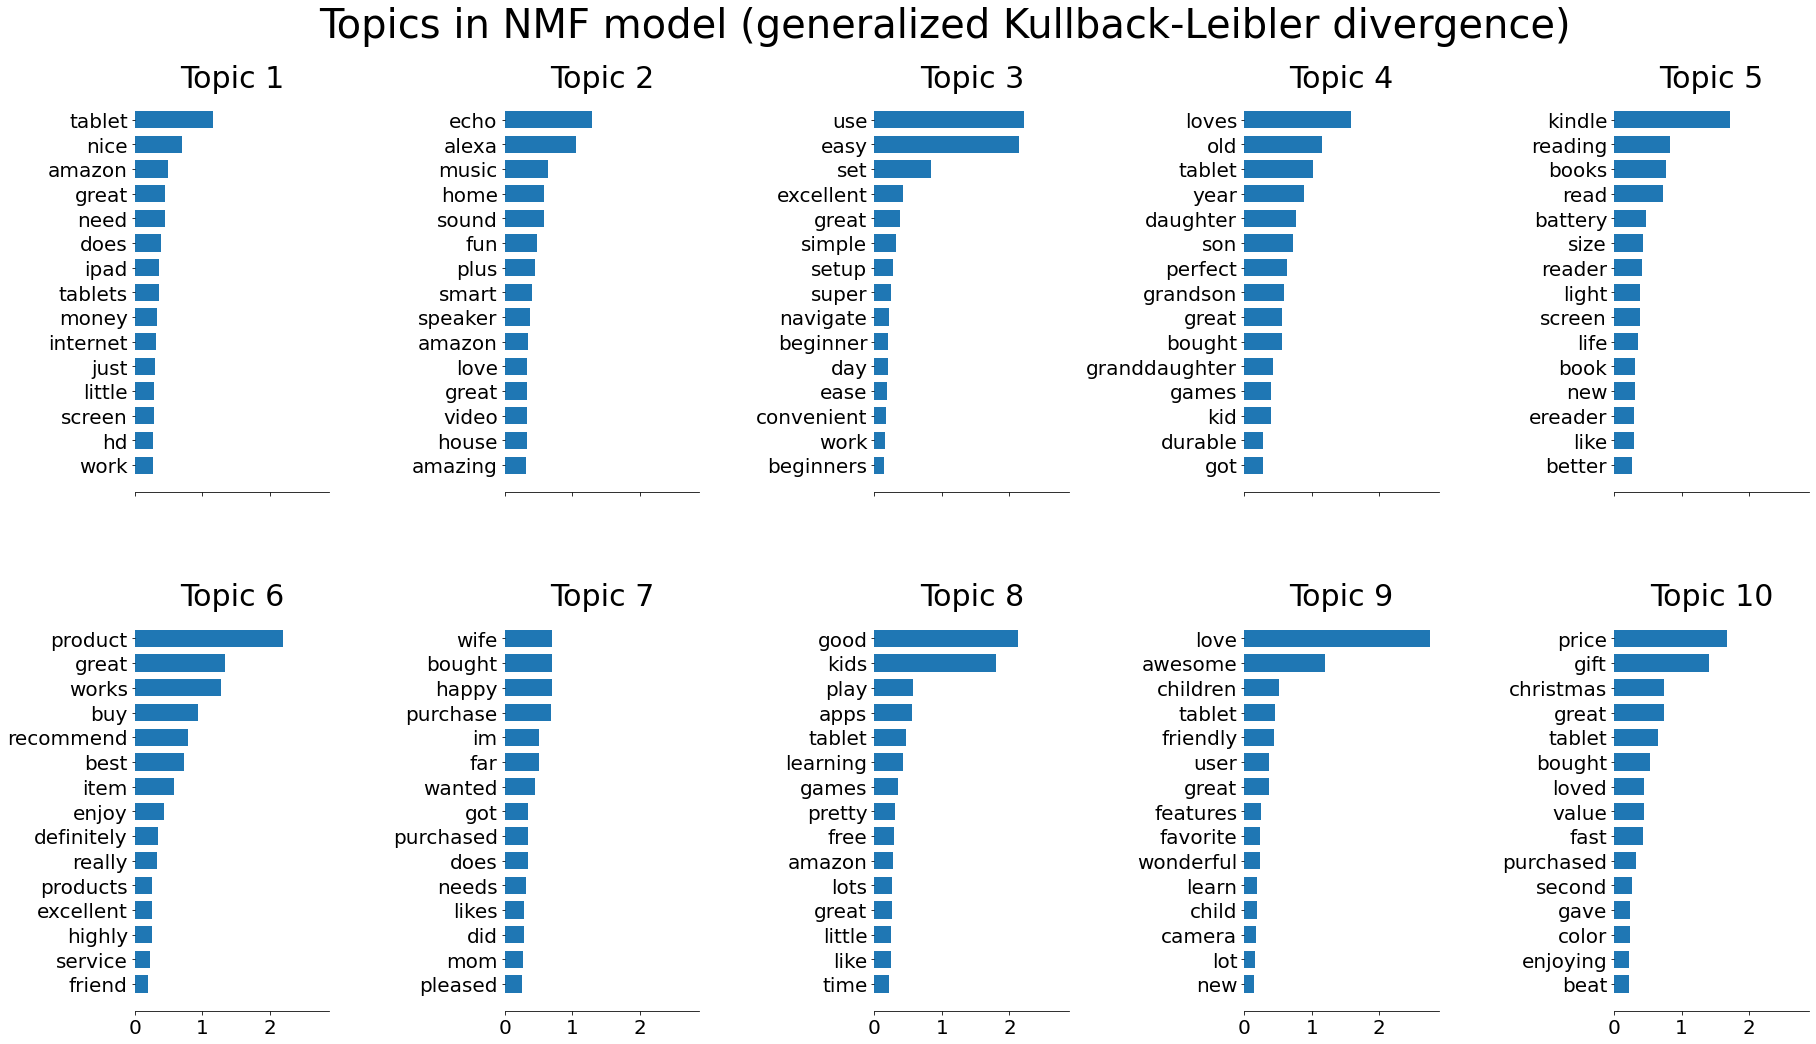

In [39]:
#-----------------------
#--- data_samples = data[:n_samples]
#-----------------------------
data_samples = sentences[:2*n_samples]
data_samples = sentences[:]


#----------------------------------
#--------------------------------
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features,ngram_range=(1,1), stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features,ngram_range=(1,1), stop_words="english"
)

#-----
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit1 the NMF model 
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = skl_dec.NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)
#------

# Fit2 the NMF model 
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = skl_dec.NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)


# Test2

In [70]:
all_reviews  = df["reviews.text"].astype('str').tolist()
all_reviews = [text_processing2(cleanText(doc)).split() for doc in all_reviews]

data_samples=all_reviews

In [79]:
import scipy as sp;
import sklearn;
import sys;
from nltk.corpus import stopwords;
import nltk;
from gensim.models import ldamodel
import gensim.corpora;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle;

all_reviews  = df["reviews.text"].astype('str').tolist()
all_reviews = [text_processing2(cleanText(doc)).split() for doc in all_reviews]

#number of topics we will cluster for: num_topics=10 and num_topn=15
num_topics = 10
num_topn=15



In [78]:
# --- Case LDA
id2word = gensim.corpora.Dictionary(all_reviews);

corpus = [id2word.doc2bow(text) for text in all_reviews];

lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics);

# # generating LDA topics
# 
# We will iterate over the number of topics, get the top words in each cluster and add them to a dataframe.
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = num_topn);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);


df_t=get_lda_topics(lda, num_topics)
df_t


KeyboardInterrupt: ignored

In [ ]:
#tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    lda,
    df.columns,
    np.array(df_t),
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

In [ ]:
import nltk
nltk.download('wordnet')

doc_complete = data2["Processed_Review"].tolist()
doc_clean = [cleanText(doc).split() for doc in doc_complete]

In [61]:
doc_clean=data_samples

In [62]:
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(3211 unique tokens: ['abl', 'access', 'accomplish', 'ad', 'add']...)


In [63]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix
from gensim.models import LdaModel
NUM_TOPICS = 9
ldamodel = LdaModel(doc_term_matrix, num_topics=NUM_TOPICS, id2word=dictionary, passes=30)
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.064*"kindl" + 0.052*"read" + 0.033*"book" + 0.023*"love" + 0.016*"one" + 0.013*"screen" + 0.013*"batteri" + 0.013*"last" + 0.013*"much" + 0.012*"light"')

(1, '0.073*"love" + 0.042*"tablet" + 0.036*"use" + 0.036*"bought" + 0.027*"easi" + 0.026*"old" + 0.026*"year" + 0.025*"kid" + 0.025*"great" + 0.023*"gift"')

(2, '0.033*"use" + 0.033*"tablet" + 0.019*"screen" + 0.018*"good" + 0.018*"great" + 0.013*"like" + 0.011*"realli" + 0.008*"price" + 0.008*"enjoy" + 0.008*"product"')

(3, '0.049*"tablet" + 0.032*"app" + 0.022*"amazon" + 0.018*"work" + 0.018*"play" + 0.017*"great" + 0.017*"game" + 0.016*"video" + 0.013*"watch" + 0.013*"movi"')

(4, '0.083*"great" + 0.040*"work" + 0.036*"easi" + 0.032*"price" + 0.031*"product" + 0.020*"use" + 0.018*"recommend" + 0.016*"well" + 0.016*"tablet" + 0.015*"set"')

(5, '0.023*"good" + 0.022*"best" + 0.019*"amazon" + 0.015*"buy" + 0.014*"kindl" + 0.013*"would" + 0.010*"fire" + 0.010*"one" + 0.010*"differ" + 0.010*"get"')

(6, '0.047*"echo" + 0.025*

In [64]:
word_dict = {}
for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]

In [65]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8
0,kindl,love,use,tablet,great,good,echo,love,use
1,read,tablet,tablet,app,work,best,sound,alexa,great
2,book,use,screen,amazon,easi,amazon,alexa,music,echo
3,love,bought,good,work,price,buy,music,like,home
4,one,easi,great,play,product,kindl,use,show,devic
5,screen,old,like,great,use,would,love,play,alexa
6,batteri,year,realli,game,recommend,fire,show,great,show
7,last,kid,price,video,well,one,speaker,thing,smart
8,much,great,enjoy,watch,tablet,differ,dot,better,amazon
9,light,gift,product,movi,set,get,get,echo,easi


In [ ]:
===================================================================

In [67]:
import scipy as sp;
import sklearn;
import sys;
from nltk.corpus import stopwords;
import nltk;
from gensim.models import ldamodel
import gensim.corpora;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;
import pickle;



#We only need the Headlines_text column from the data
data_text = df[['reviews.text']]
data_text = data_text.astype('str');

for idx in range(len(data_text)):
    
    #go through each word in each data_text row, remove stopwords, and set them on the index.
    data_text.iloc[idx]['reviews.text'] = [word for word in data_text.iloc[idx]['reviews.text'].split(' ') if word not in stopwords.words()];
    
    #print logs to monitor output
    if idx % 1000 == 0:
        sys.stdout.write('\rc = ' + str(idx) + ' / ' + str(len(data_text)));


#save data because it takes very long to remove stop words
pickle.dump(data_text, open('data_text.dat', 'wb'))


#get the words as an array for lda input
train_headlines = [value[0] for value in data_text.iloc[0:].values];


#number of topics we will cluster for: 10
num_topics = 10;


# # LDA
# 
# We will use the gensim library for LDA. First, we obtain a id-2-word dictionary. For each headline, we will use the dictionary to obtain a mapping of the word id to their word counts. The LDA model uses both of these mappings.


id2word = gensim.corpora.Dictionary(train_headlines);


corpus = [id2word.doc2bow(text) for text in train_headlines];


lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics);


# # generating LDA topics
# 
# We will iterate over the number of topics, get the top words in each cluster and add them to a dataframe.

def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

get_lda_topics(lda, num_topics)

c = 2000 / 4000

KeyboardInterrupt: ignored